# 서울시 코로나19 데이터 크롤링해오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
# html을 table 태그를 가져올 수 있음. 로그인 없어야 함
# 리스트 형식으로 반환해줌
# 테이블 변수에 넣어주고 len 함수를 써서 몇 개의 테이블을 가져왔는지 확인

table = pd.read_html(url)
len(table)

62

In [4]:
# 테이블 넘버링을 통해 원하는 테이블을 가져오기
# .T는 행과 열을 바꿔주는 방법

table[2].T

,0
소계,6372
해외유입,480
서초구 빌딩 관련,13
강서구 가족 관련,4
용인시 동문골프 모임 관련,30
동대문구 에이스희망케어센터 관련,35
강남구 역삼역 관련,12
강남구 헬스장 관련,46
강남구 럭키사우나 관련,41
강서구 보험회사 관련,21


In [5]:
# df에 원하는 테이블을 담아준다

df = table[3]
df.shape

(6372, 7)

In [6]:
# 미리보기하기

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN
3,6369,27506,11.08.,서대문구,-,타시도 확진자 접촉,NaN
4,6368,27507,11.08.,은평구,-,타시도 확진자 접촉,NaN


In [7]:
# 확진자 정보를 csv 파일로 만들고 싶다! 파일명에 추출한 날짜를 넣어주기 위해서 최근 확진일 불러오기
# 인덱스로 첫번째 행에 대한 데이터만 불러오기

last_day = df.loc[0, '확진일']
last_day = last_day.replace(".", "_")
last_day

'11_08_'

In [8]:
# 파일명 만들기
# f스트링 활용해서 제목 만들기

file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_11_08_.csv'

In [9]:
# csv로 확인하기
#unnamed:0는 index가 같이 저장 된 것
# index는 따로 저장하지 않으려면 index = False로 해줘야 함
# 엑셀로 저장하려면 cp949, 읽어올때도 encoding = cp949로 해줘야 함

df.to_csv(file_name, index = False)

In [10]:
#unnamed:0는 index가 같이 저장 된 것

pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN
3,6369,27506,11.08.,서대문구,-,타시도 확진자 접촉,NaN
4,6368,27507,11.08.,은평구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
6367,5,9,1.31.,성북구,-,#5 접촉,퇴원
6368,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6369,3,6,1.30.,종로구,-,#3 접촉,퇴원
6370,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


# 크롤링 데이터 순서 조정

In [11]:
df.shape

(6372, 7)

In [12]:
# 연번을 역순으로 정렬하기
# sort_values는 내가 직접 어떤거 기준으로 할 것인지 지정해줌

df = df.sort_values(by= '연번', ascending=False)

In [13]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN
3,6369,27506,11.08.,서대문구,-,타시도 확진자 접촉,NaN
4,6368,27507,11.08.,은평구,-,타시도 확진자 접촉,NaN


# 시각화 도구 불러오기

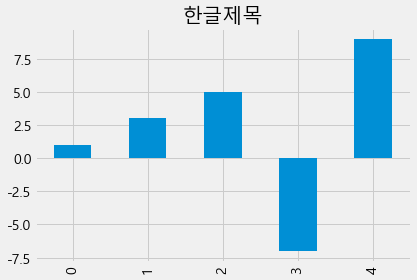

In [14]:
# 한글제목으로 하면 오류남. 미리 설정해야함 (matplotlib 활용필수)
# 맑은 고딕으로 폰트 설정해줘야함
# -값도 그냥 해주면 깨지는데, -도 따로 axes 설정해줘야함
# fivethirtyeight는 아래처럼 grid나 배경처럼 다양한 스타일을 변경할 수 있음

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)
plt.style.use('fivethirtyeight')

pd.Series([1,3,5,-7,9]).plot.bar(title='한글제목')

In [15]:
# 레티나 설정을 해주면 plot을 좀 더 선명하게 확인할 수 있다

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 확진일 분석해보기

### 확진일 데이터 전처리

In [16]:
# 각 컬럼의 값이 몇개씩 있는지 세어준다

df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
2.7.       1
5.01.      1
2.2.       1
5.31.      1
4.19.      1
Name: 확진일, Length: 262, dtype: int64

In [17]:
df['확진일'].head(1)

0    11.08.
Name: 확진일, dtype: object

In [18]:
# object에서 string으로 데이터타입을 변경해주고 to_datetime함수를 써서 날짜형식으로 변환해준다

df['확진일자'] = pd.to_datetime("2020-"+df['확진일'].str.replace('.','-'))
df[['확진일', '확진일자']].head(3)

,확진일,확진일자
0,11.08.,2020-11-08
1,11.08.,2020-11-08
2,11.08.,2020-11-08


In [19]:
# 월만 추출하기
# .dt는 날짜 옵션 가져오기 가능

df['월'] = df['확진일자'].dt.month
df[['월', '확진일자', '확진일']].tail(1)

,월,확진일자,확진일
6371,1,2020-01-24,1.24.


In [20]:
# 해당 연도의 몇 번째 주인지 계산해줌

df['주'] = df['확진일자'].dt.week
df[['월', '확진일자', '확진일','주']].tail(5)

,월,확진일자,확진일,주
6367,1,2020-01-31,1.31.,5
6368,1,2020-01-30,1.30.,5
6369,1,2020-01-30,1.30.,5
6370,1,2020-01-30,1.30.,5
6371,1,2020-01-24,1.24.,4


### 확진일 시각화하기

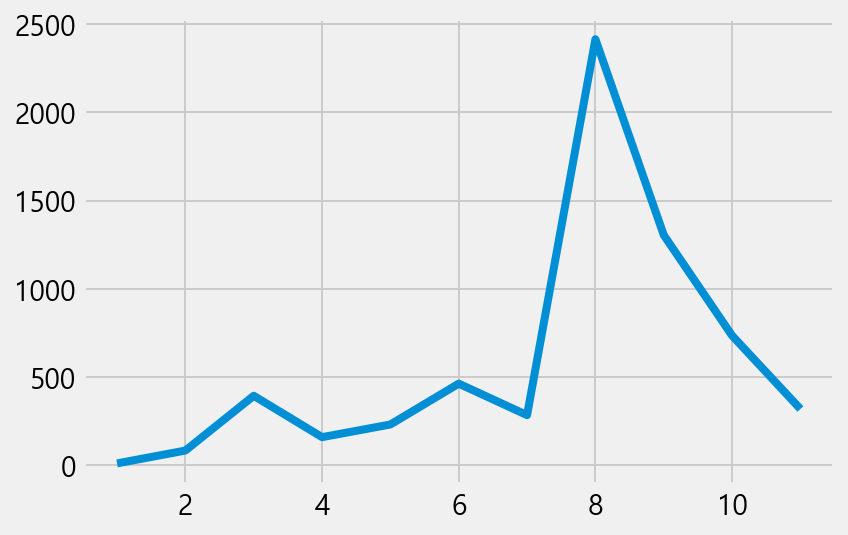

In [21]:
df['월'].value_counts().sort_index().plot()

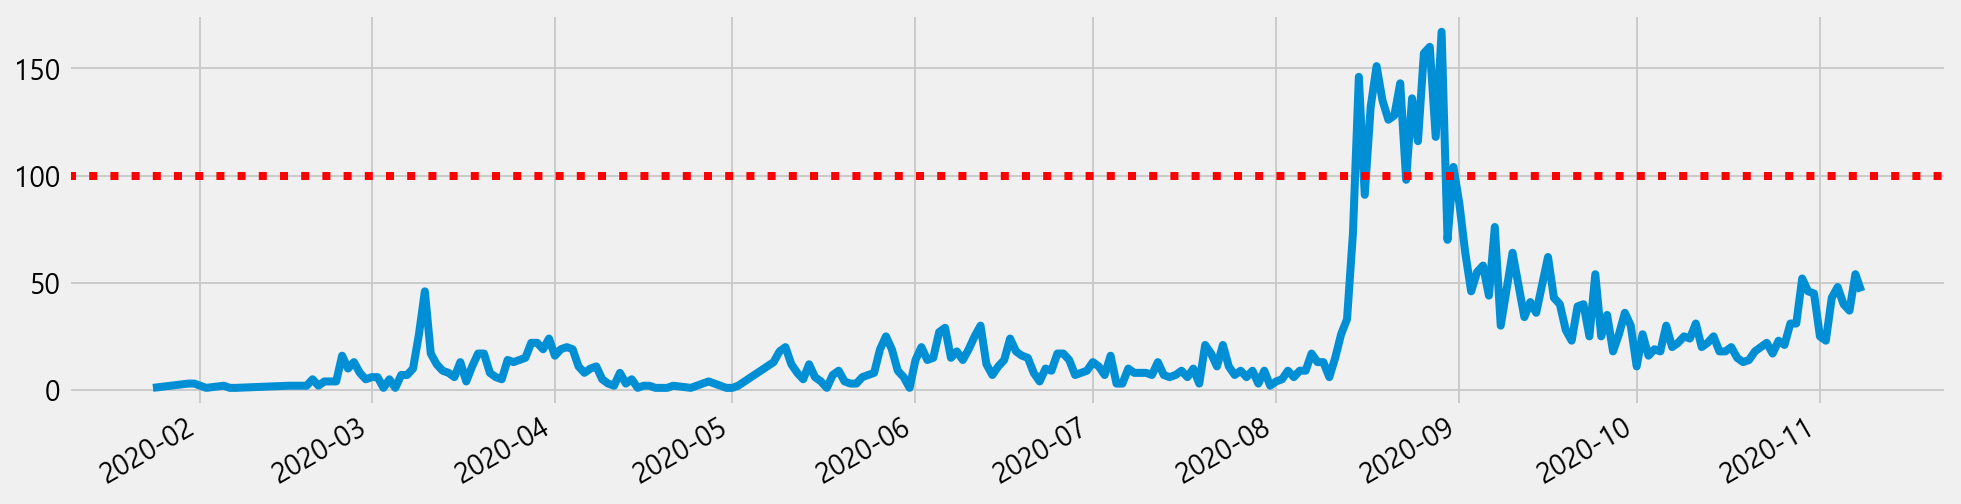

In [22]:
# figure사이즈를 변경하기
# hline은 horizontal, vline은 vertical
# :은 작은 점선, --은 좀 더 굵은 것

df['확진일자'].value_counts().sort_index().plot(figsize = (15,4))
plt.axhline(100, color='red', linestyle=':')

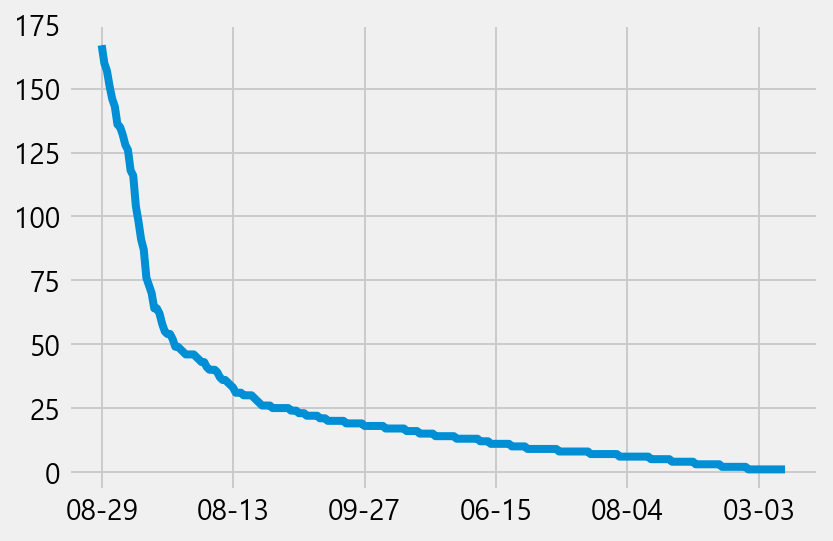

In [23]:
# 그래프에 숫자 표시하기위한 전처리
# astype(str)으로 바꿔주는 이유는 슬라이싱은 문자열에서만 되기 때문
# 뒤에서부터 5개 가져오기 위해 임의지정함수 lambda를 사용함
# 여기서 그래프 이상하게 그려지는 이유는 날짜가 string이기 때문에 그냥 빈도수 많은 차례로 그려지기 때문

df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])
# value_counts는 시리즈에서 빈도수를 찾을 때 씀
df['월일'].value_counts().plot()

In [24]:
# sort_index를 활용해서 index 순서대로 정렬을 하고 변수에 담아준다
# 위에 테이블에서 보면 한 확진자당 각각 날짜가 적혀있음. 따라서 value_counts해주면 그 날짜가 몇 개인지 세어 주겠지!
# 여기서 인덱스는 날짜

day_count = df['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
11-04    48
11-05    40
11-06    37
11-07    54
11-08    46
Name: 월일, Length: 261, dtype: int64

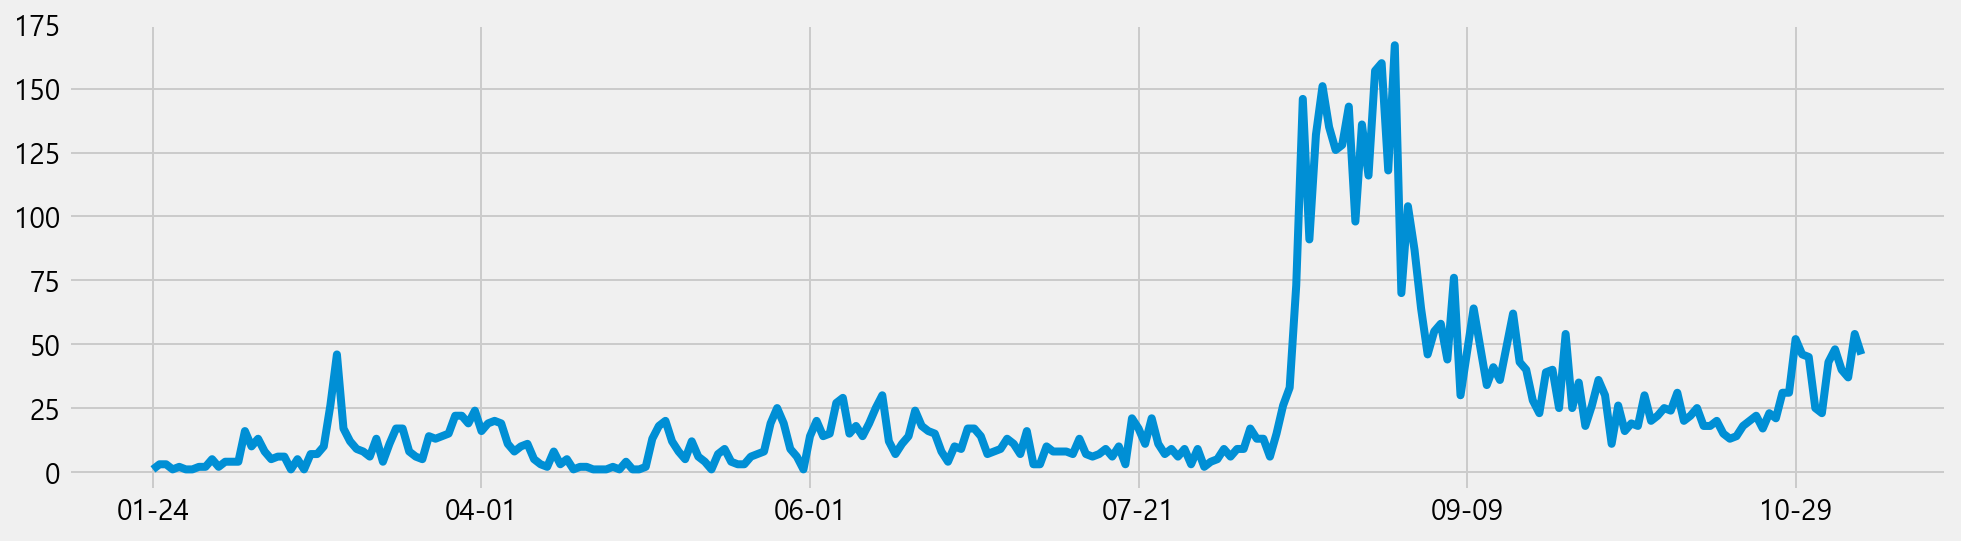

In [25]:
day_count.plot(figsize = (15,4))

In [26]:
# loc는 정확히 index 이름이 있어야만 작동을 한다
# iloc는 인덱스 값이 없어도 작동함. 그래서 시리즈 형태로 index 없는 지금은 iloc를 사용하는 것

day_count.iloc[0]

1

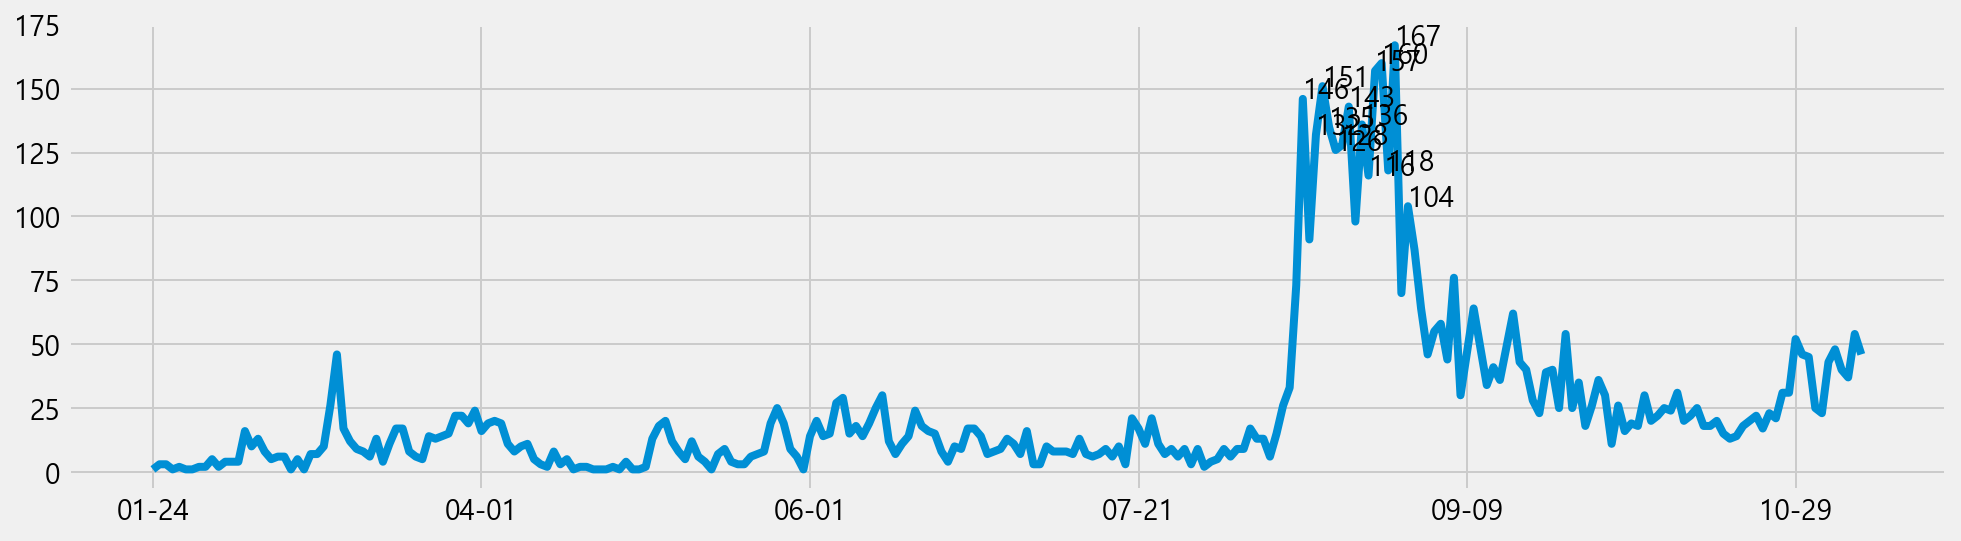

In [27]:
# 그래프에 값 표기하기
# 변수에 할당하면 아래 설명값 안나오게 할 수 있음
# .text 함수에는 x,y는 축 (x는 인덱스), s는 넣을 값

g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count >= 100:
        g.text(x=i, y=case_count, s=case_count)

In [28]:
# 확진자가 발생한 날짜의 갯수

len(day_count)

261

In [29]:
# for i in range n 하면 0부터 n-1까지의 숫자, n개의 숫자가 들어간다

for i in range (len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 9
130 13
131 11
132 7
133 16
134 3
135 3
136 10
137 8
138 8
139 8
140 7
141 13
142 7
143 6
144 7
145 9
146 6
147 10
148 3
149 21
150 17
151 11
152 21
153 11
154 7
155 9
156 6
157 9
158 3
159 9
160 2
161 4
162 5
163 9
164 6
165 9
166 9
167 17
168 13
169 13
170 6
171 15
172 2

### 확진자가 가장 많이 나온 날

In [30]:
day_count.describe()

count    261.000000
mean      24.413793
std       31.943418
min        1.000000
25%        7.000000
50%       14.000000
75%       25.000000
max      167.000000
Name: 월일, dtype: float64

In [31]:
day_count.max()

167

In [32]:
# 최댓값에 해당하는 행을 불러올 수 있다

day_count [day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

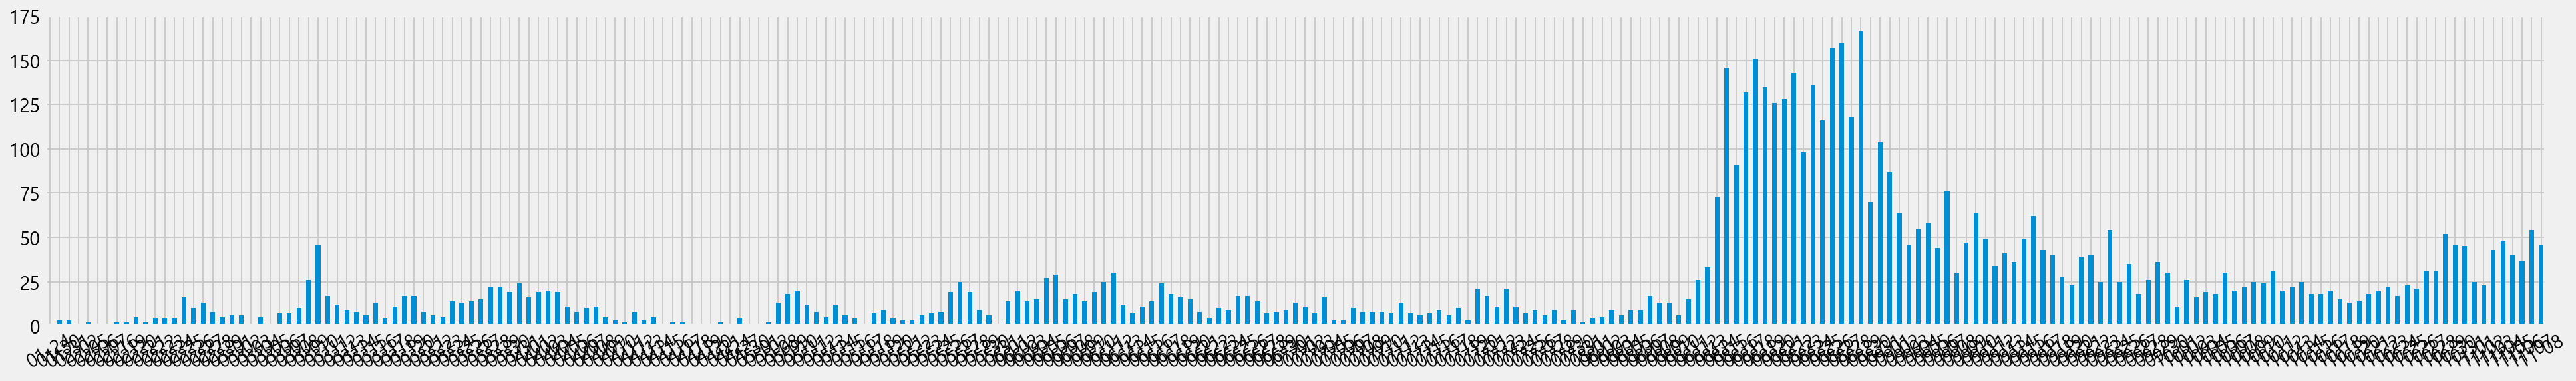

In [33]:
day_count.plot.bar(figsize = (30,4), rot = 30)

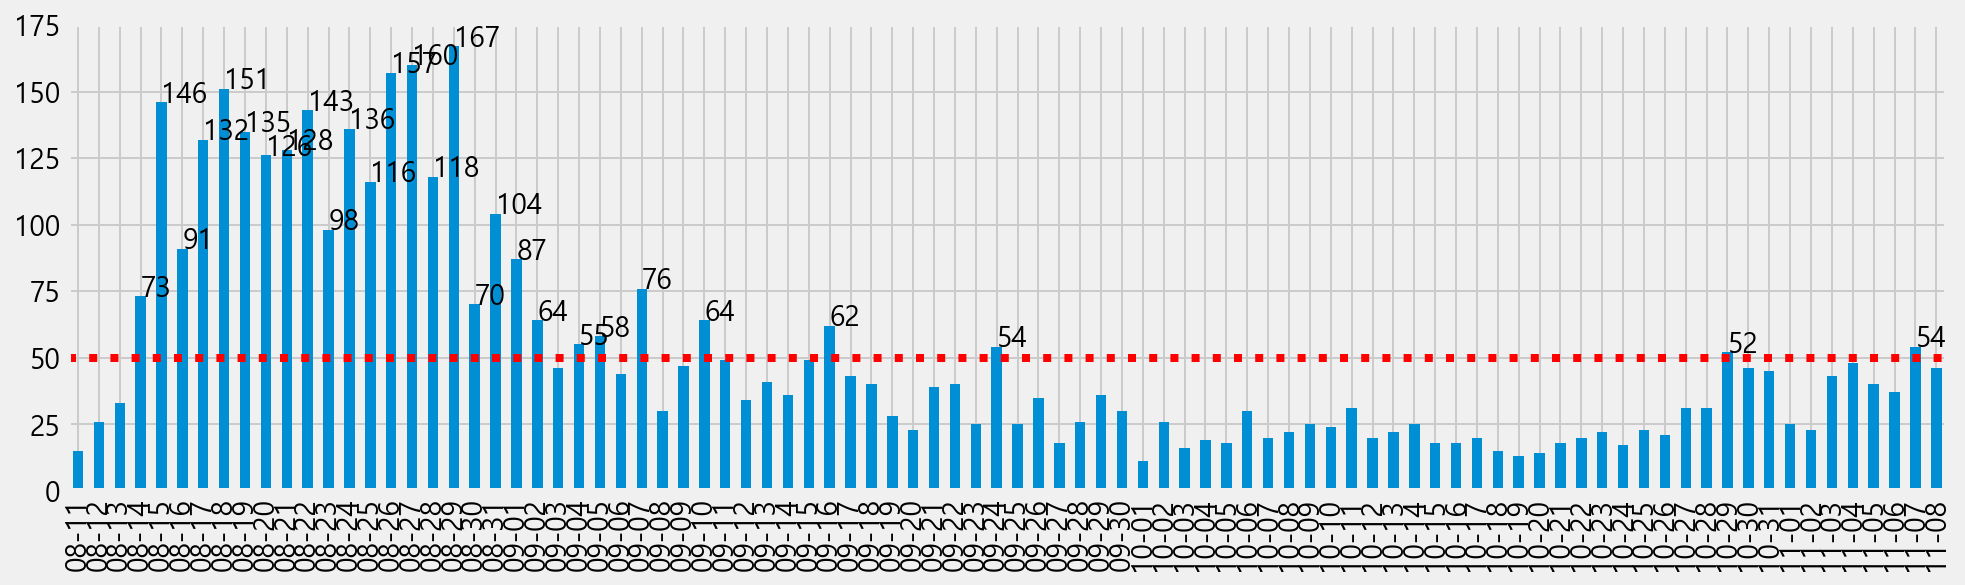

In [34]:
g = day_count[-90:].plot.bar(figsize = (15,4))
plt.axhline(50, color='red', linestyle=':') # plot 그리는 칸과 같은 칸에서 실행해줘야 함

for i in range (90):
    case_count = day_count[-90:].iloc[i]
    if case_count >=50:
        g.text (x=i, y = case_count, s = case_count)

#### 강의에서 안나온 나 혼자 끄적끄적
* groupby를 하지 않아도 아래처럼 특정 컬럼을 불러오고 value_counts를 해주면 해당 컬럼을 자동으로 그룹바이 해주고 frequency를 세어줌

In [35]:
a = df[df['월일'] == "08-29"]
a = pd.DataFrame(a['접촉력'].value_counts())

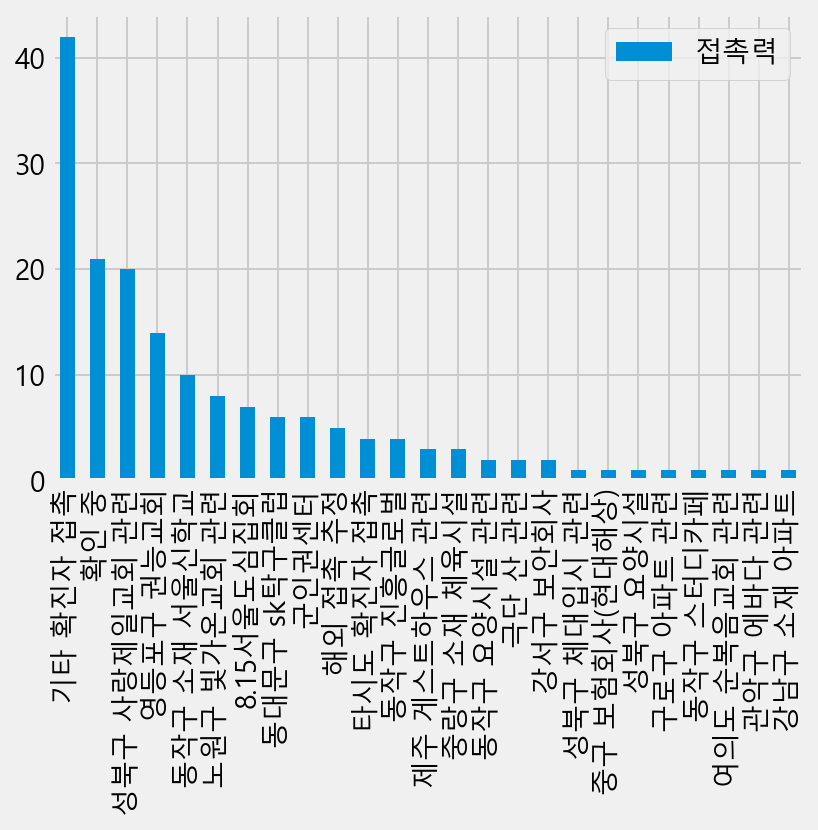

In [36]:
a.plot.bar()

#### 월별 확진자 수 추이

In [37]:
month_case = df['월'].value_counts().sort_index()
month_case

1        7
2       80
3      391
4      156
5      228
6      460
7      281
8     2416
9     1304
10     733
11     316
Name: 월, dtype: int64

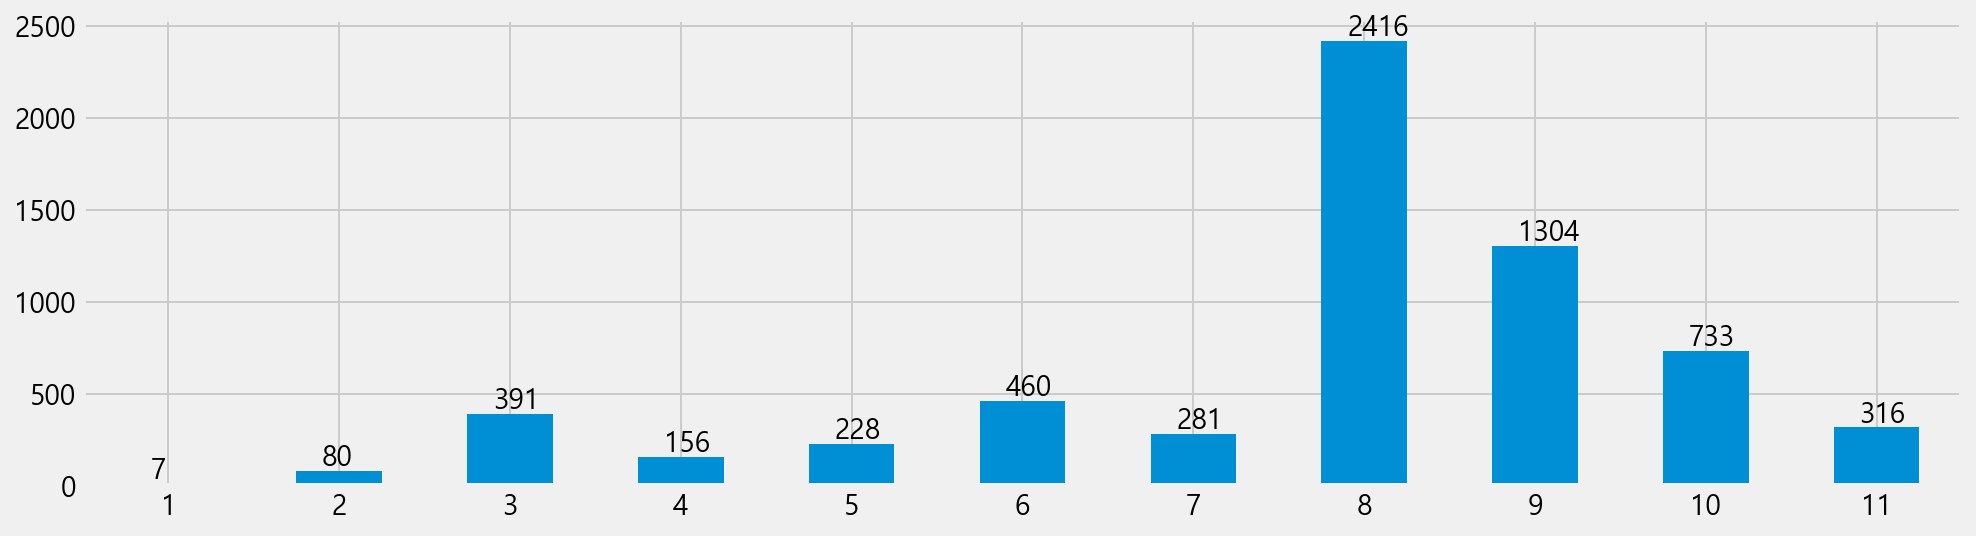

In [38]:
g = month_case.plot.bar(figsize = (15,4), rot = 0)

for i in range (len(month_case)):
    g.text(x=i-0.1, y = month_case.iloc[i]+30, s = month_case.iloc[i])

### 주단위 확진자 수 그리기

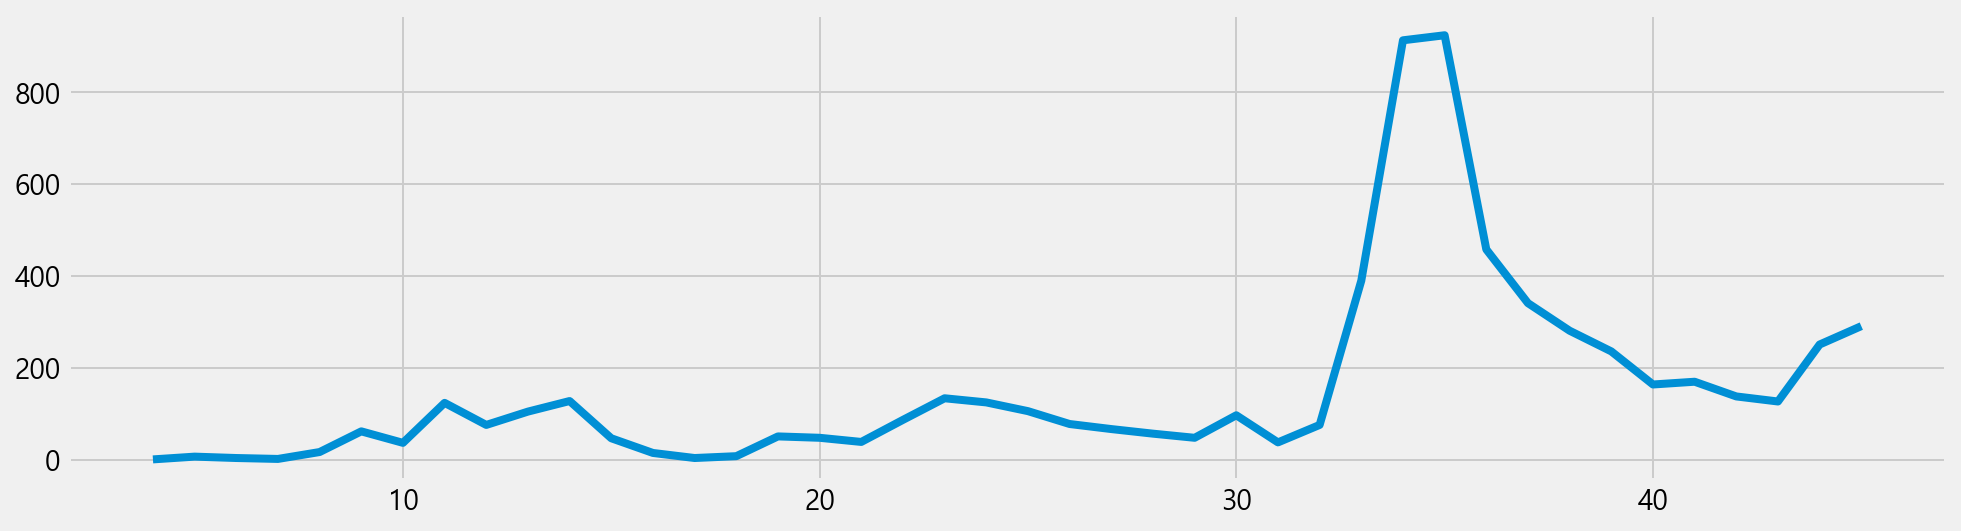

In [39]:
# 인덱스값 (1주차~) 순서대로 정렬하려면 sort_index

weekly_case = df['주'].value_counts().sort_index()
weekly_case.plot(figsize = (15,4))

###### 주&월 함께 그리기

In [40]:
# value_counts는 데이터프레임에서 못 씀, only in series
# mean이나 std 같은걸 바로바로 보려면 agg({컬럼:수치계산}), 아래경우는 groupby로 충분할 듯

month_weekly = df.groupby(['월','주'])['연번'].count()
month_weekly

월   주 
1   4       1
    5       6
2   5       1
    6       4
    7       2
    8      17
    9      56
3   9       6
    10     37
    11    124
    12     76
    13    105
    14     43
4   14     85
    15     47
    16     15
    17      4
    18      5
5   18      3
    19     51
    20     48
    21     39
    22     87
6   23    134
    24    125
    25    106
    26     78
    27     17
7   27     50
    28     57
    29     48
    30     97
    31     29
8   31      9
    32     76
    33    390
    34    913
    35    924
    36    104
9   36    354
    37    341
    38    281
    39    236
    40     92
10  40     72
    41    170
    42    138
    43    127
    44    226
11  44     25
    45    291
Name: 연번, dtype: int64

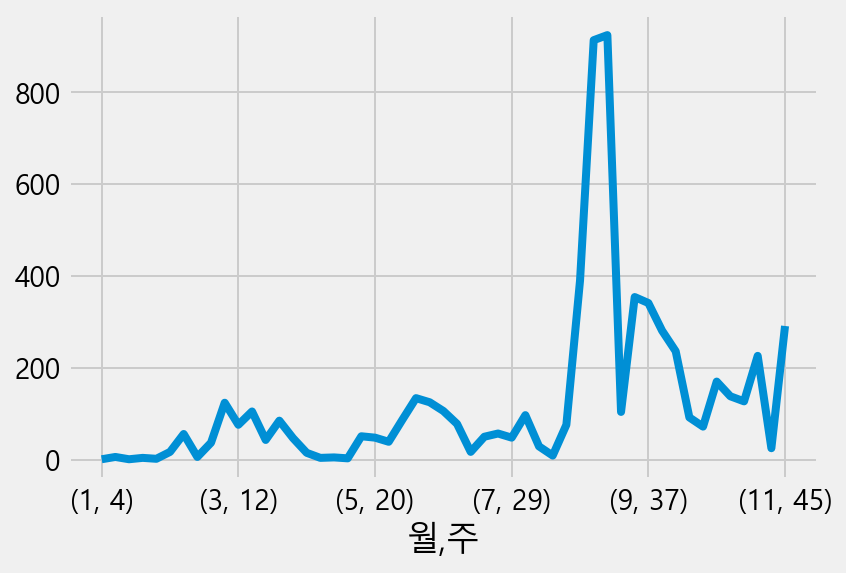

In [41]:
# multi index로 튜플로 x값이 나옴

month_weekly.plot()

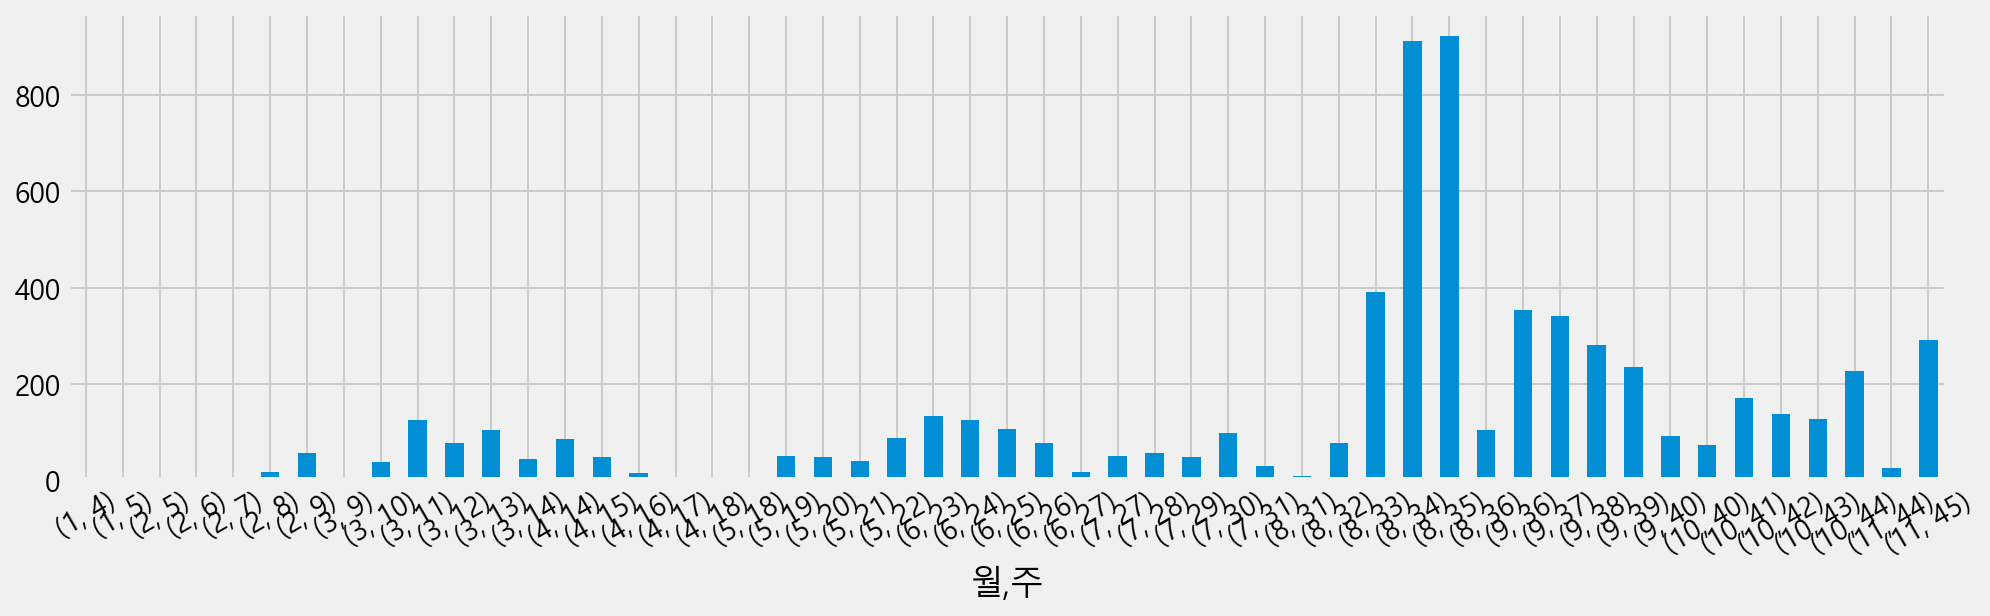

In [42]:
month_weekly.plot.bar(figsize = (15,4),rot = 30)

### 모든 날짜를 행에 만들어주기

In [43]:
# 제일 처음&마지막 걸린 사람의 확진일자

first_day = df.iloc[-1, 7]
last_day = df.iloc[0, 7]

In [44]:
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [45]:
#1 : days.to_frame()
df_days = pd.DataFrame({'확진일자': days})
df_days.head(5)

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [46]:
daily_case = df['확진일자'].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case

,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146
...,...
2020-05-17,1
2020-02-07,1
2020-04-15,1
2020-01-24,1


In [47]:
# 확진일자를 value_counts 해두고 컬럼명을 변경해주었다

df_daily_case.columns = ['확진수']
df_daily_case

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146
...,...
2020-05-17,1
2020-02-07,1
2020-04-15,1
2020-01-24,1


## 데이터프레임 : all_days => 확진일, 확진자수, 누적확진자수, 확진년월일

##### pd.merge (df1, df2)로 안하고 df1.merge(df2, 조건) 이런식으로도 가능하다

In [48]:
#left_on은 기준테이블, right_on은 붙이는 테이블, 각각 어떤걸 기준으로 붙일 것인지!
# outer로 해줘야지 확진자가 없던 날의 정보도 다 들어갈 수 있음

all_days = df_days.merge(df_daily_case, how='left', left_on='확진일자', right_on=df_daily_case.index)
all_days.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


### 누적확진자 수 구하기

In [49]:
all_days['확진수'].sum()

6372.0

In [50]:
# 확진자가 발생하지 않은 날짜들에 fillna를 해주고 cumsum을 통해 간단하게 누적확진수를 구했다
# 여기서 fillna를 바로 하지 않는 것이 좋음. 왜냐하면 그래프를 그릴 때 0명인데도 라인그래프가 이어져서 구분이 안되기 때문!
all_days['누적확진'] = all_days['확진수'].fillna(0).cumsum()
all_days.head()

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0


In [51]:
#datetype은 무조건 숫자형태임. 따라서 스트링으로 변경시켜줘야함 (인덱싱은 스트링만 됨)

all_days['일자'] = all_days['확진일자'].astype(str).apply(lambda x: x[-5:])
all_days

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28
...,...,...,...,...
285,2020-11-04,48.0,6195.0,11-04
286,2020-11-05,40.0,6235.0,11-05
287,2020-11-06,37.0,6272.0,11-06
288,2020-11-07,54.0,6326.0,11-07


## 데이터프레임: cum_day => 그래프 그리기 위해 일자를 인덱스로 확진자수 + 누적확진자수

In [52]:
# 일자를 인덱스로 만들어줘야지 plotting하기에 좀 더 편함 (축 안 정해도 되니까)

cum_day = all_days[['일자', '확진수','누적확진']]
cum_day = cum_day.set_index('일자')
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
11-04,48.0,6195.0
11-05,40.0,6235.0
11-06,37.0,6272.0


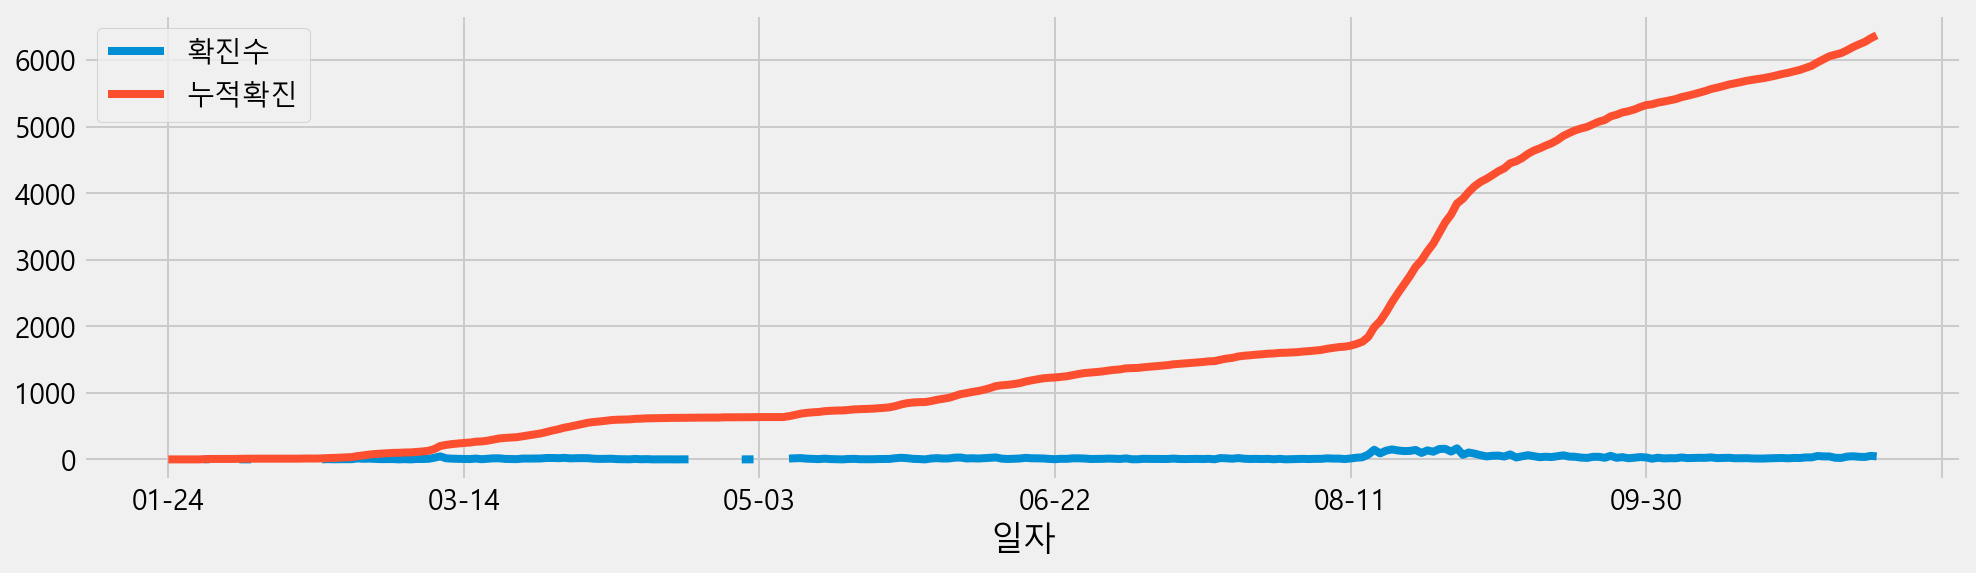

In [53]:
cum_day.plot(figsize=(15,4))

#### 시리즈로 그리기

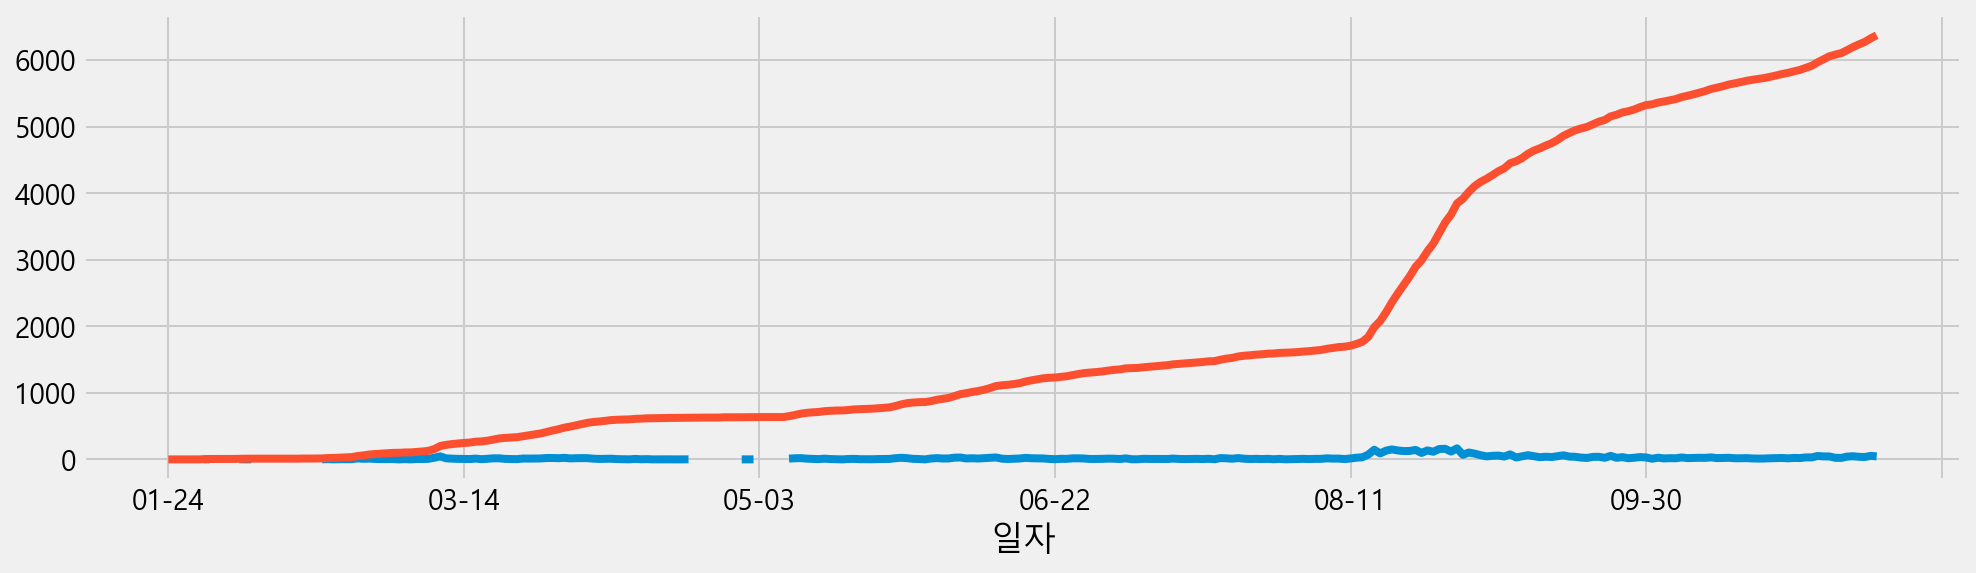

In [54]:
# 시리즈로 따로 불러와서 함께 그려볼 수 있다. 대신 위에처럼 데이터프레임으로 가져오면 key 값도 같이 출력되어 보기 편함.

cum_day['확진수'].plot(figsize=(15,4))
cum_day['누적확진'].plot(figsize=(15,4))

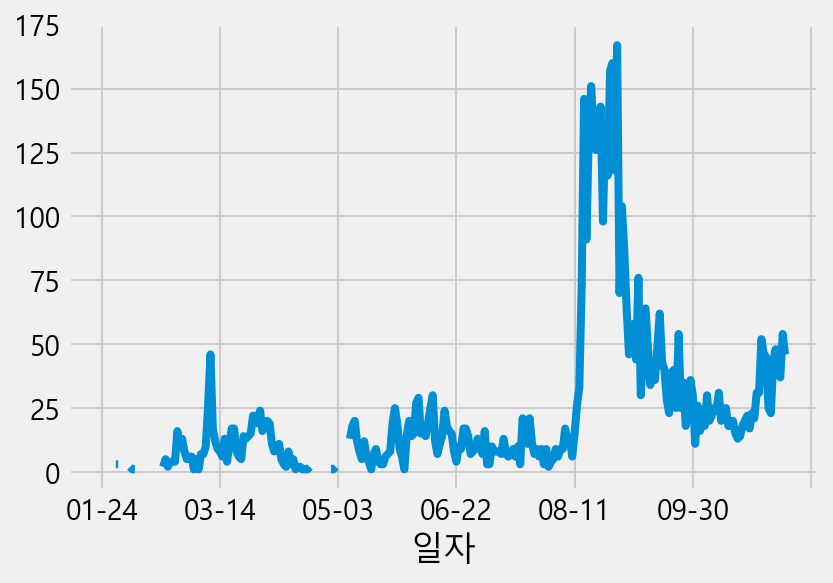

In [55]:
cum_day['확진수'].plot()

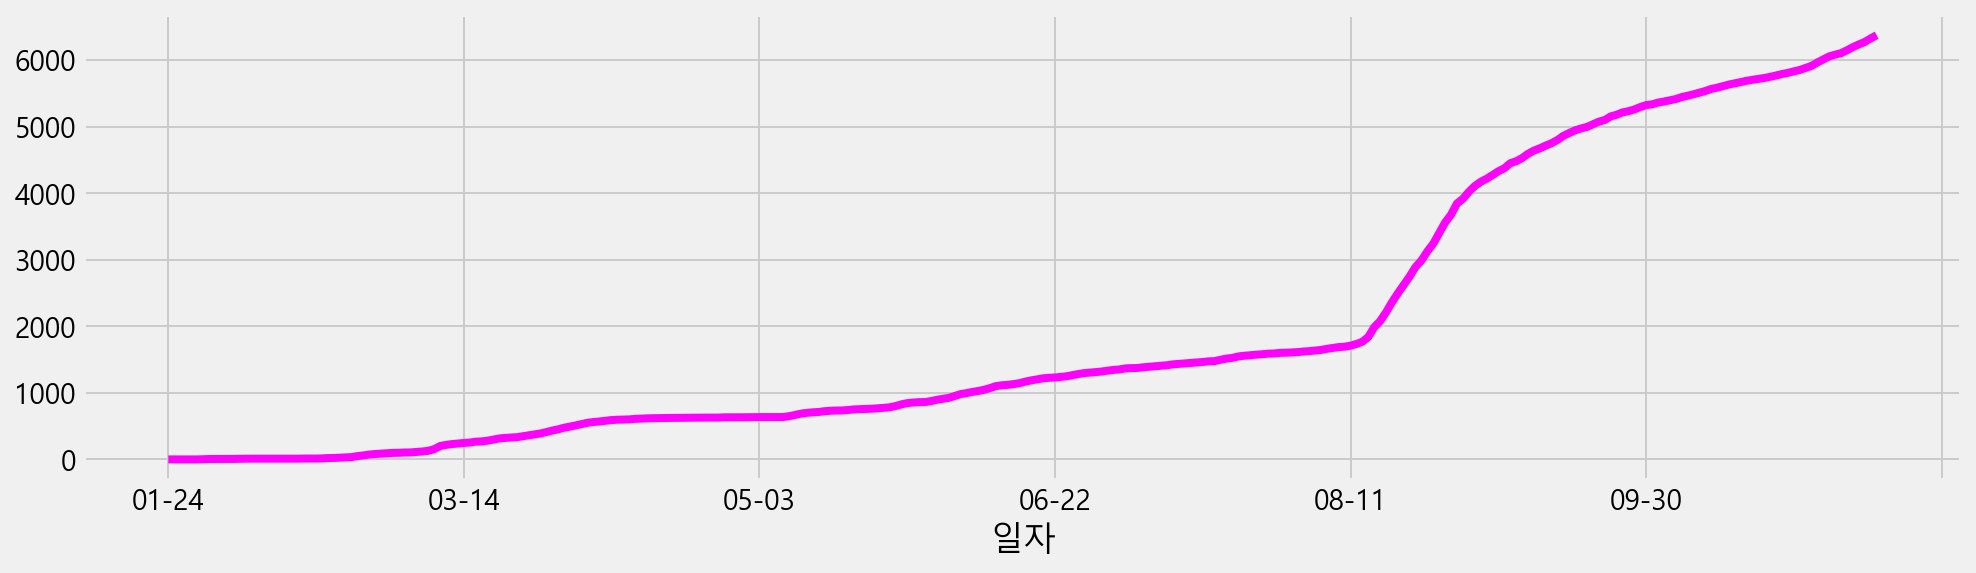

In [56]:
cum_day['누적확진'].plot(figsize = (15,4), color = 'magenta')

### 로그스케일

In [57]:
# 로그씌워서 표준화를 할 수 있다. 다만 이 때 infinity로 수렴하는 것을 방지하기 위해서 1을 더해준다

np.log(cum_day['누적확진'] + 1)

일자
01-24    0.693147
01-25    0.693147
01-26    0.693147
01-27    0.693147
01-28    0.693147
           ...   
11-04    8.731659
11-05    8.738094
11-06    8.744010
11-07    8.752581
11-08    8.759826
Name: 누적확진, Length: 290, dtype: float64

In [58]:
np.log(cum_day['확진수']+1)

일자
01-24    0.693147
01-25         NaN
01-26         NaN
01-27         NaN
01-28         NaN
           ...   
11-04    3.891820
11-05    3.713572
11-06    3.637586
11-07    4.007333
11-08    3.850148
Name: 확진수, Length: 290, dtype: float64

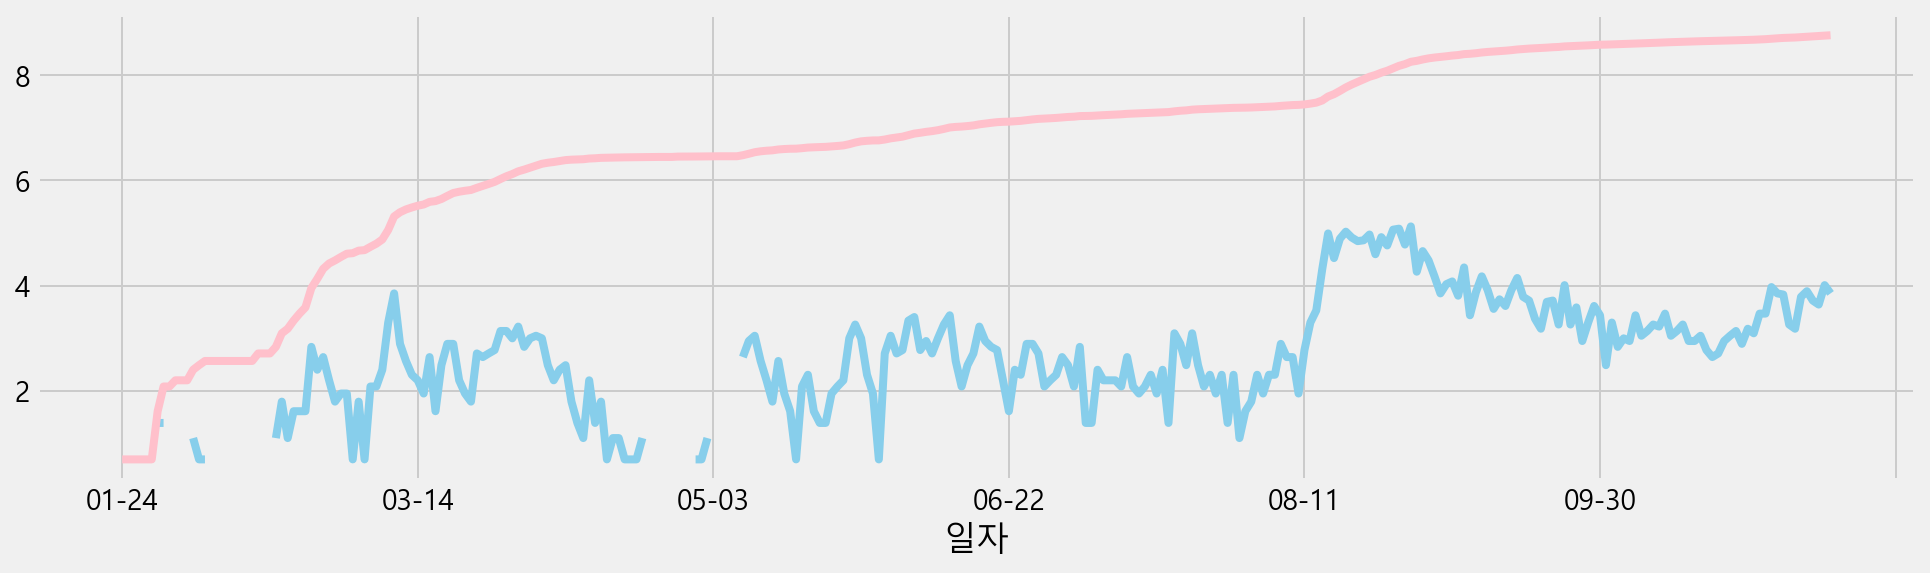

In [59]:
np.log(cum_day['확진수']+1).plot(figsize = (15,4), color = 'skyblue')
np.log(cum_day['누적확진'] + 1).plot(color = 'pink')

### 확진월과 요일 구하기
* datetime으로 구해진 날짜에 dt.month / dt.dayofweek 형식으로 월, 요일을 불러올 수 있다

In [60]:
all_days['확진월'] = all_days['확진일자'].dt.month
all_days['확진요일'] = all_days['확진일자'].dt.dayofweek
all_days.head(30)

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1
5,2020-01-29,NaN,1.0,01-29,1,2
6,2020-01-30,3.0,4.0,01-30,1,3
7,2020-01-31,3.0,7.0,01-31,1,4
8,2020-02-01,NaN,7.0,02-01,2,5
9,2020-02-02,1.0,8.0,02-02,2,6


In [61]:
# 이렇게 하게 되면 월별 확진자가 아니라, 확진월이 몇 개 있는 지 세어주는 것 (['컬럼']으로 가져온 값을 세어주는 것!)
# 그래서 30-31이 나오는 것
# 그룹바이해서 그려주기!

all_day_week = all_days.groupby(['확진월','확진요일'])['확진수'].sum()
type(all_day_week) #시리즈구만!

pandas.core.series.Series

In [62]:
# all_day_week는 멀티 인덱스로 형성되어있다
print(all_day_week)

# unstack해주면 두번째꺼를 컬럼으로 보내준다
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진월  확진요일
1    0        0.0
     1        0.0
     2        0.0
     3        3.0
     4        4.0
             ... 
11   2       48.0
     3       40.0
     4       37.0
     5       54.0
     6       71.0
Name: 확진수, Length: 77, dtype: float64


확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [63]:
# split을 써서 한꺼번에 잘라내기. 이 리스트를 가지고 column들의 이름을 바꾸게 된다

dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()

In [64]:
all_day_week.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='확진요일')

### 여러개의 컬럼명을 한 번에 바꾸는 방법 df.colums = 리스트

In [65]:
# 컬럼명들을 바꿔주었다

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [66]:
# df.style.background_gradient(cmap = '색깔'), cmap은 컬러코드를 의미함

all_day_week.style.background_gradient(cmap = 'Reds')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


### 거주지(구)별 확진자 추이 구하기
* 이전과 다르게 categorical한 데이터 분석

In [67]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08


In [68]:
# 범주형 데이터에 대한 빈도수를 세어주는 value counts

gu_count = df['거주지'].value_counts().sort_values(ascending = False)
gu_count.head(1)

관악구    486
Name: 거주지, dtype: int64

#### barh는 세로로 plotting하는 방법

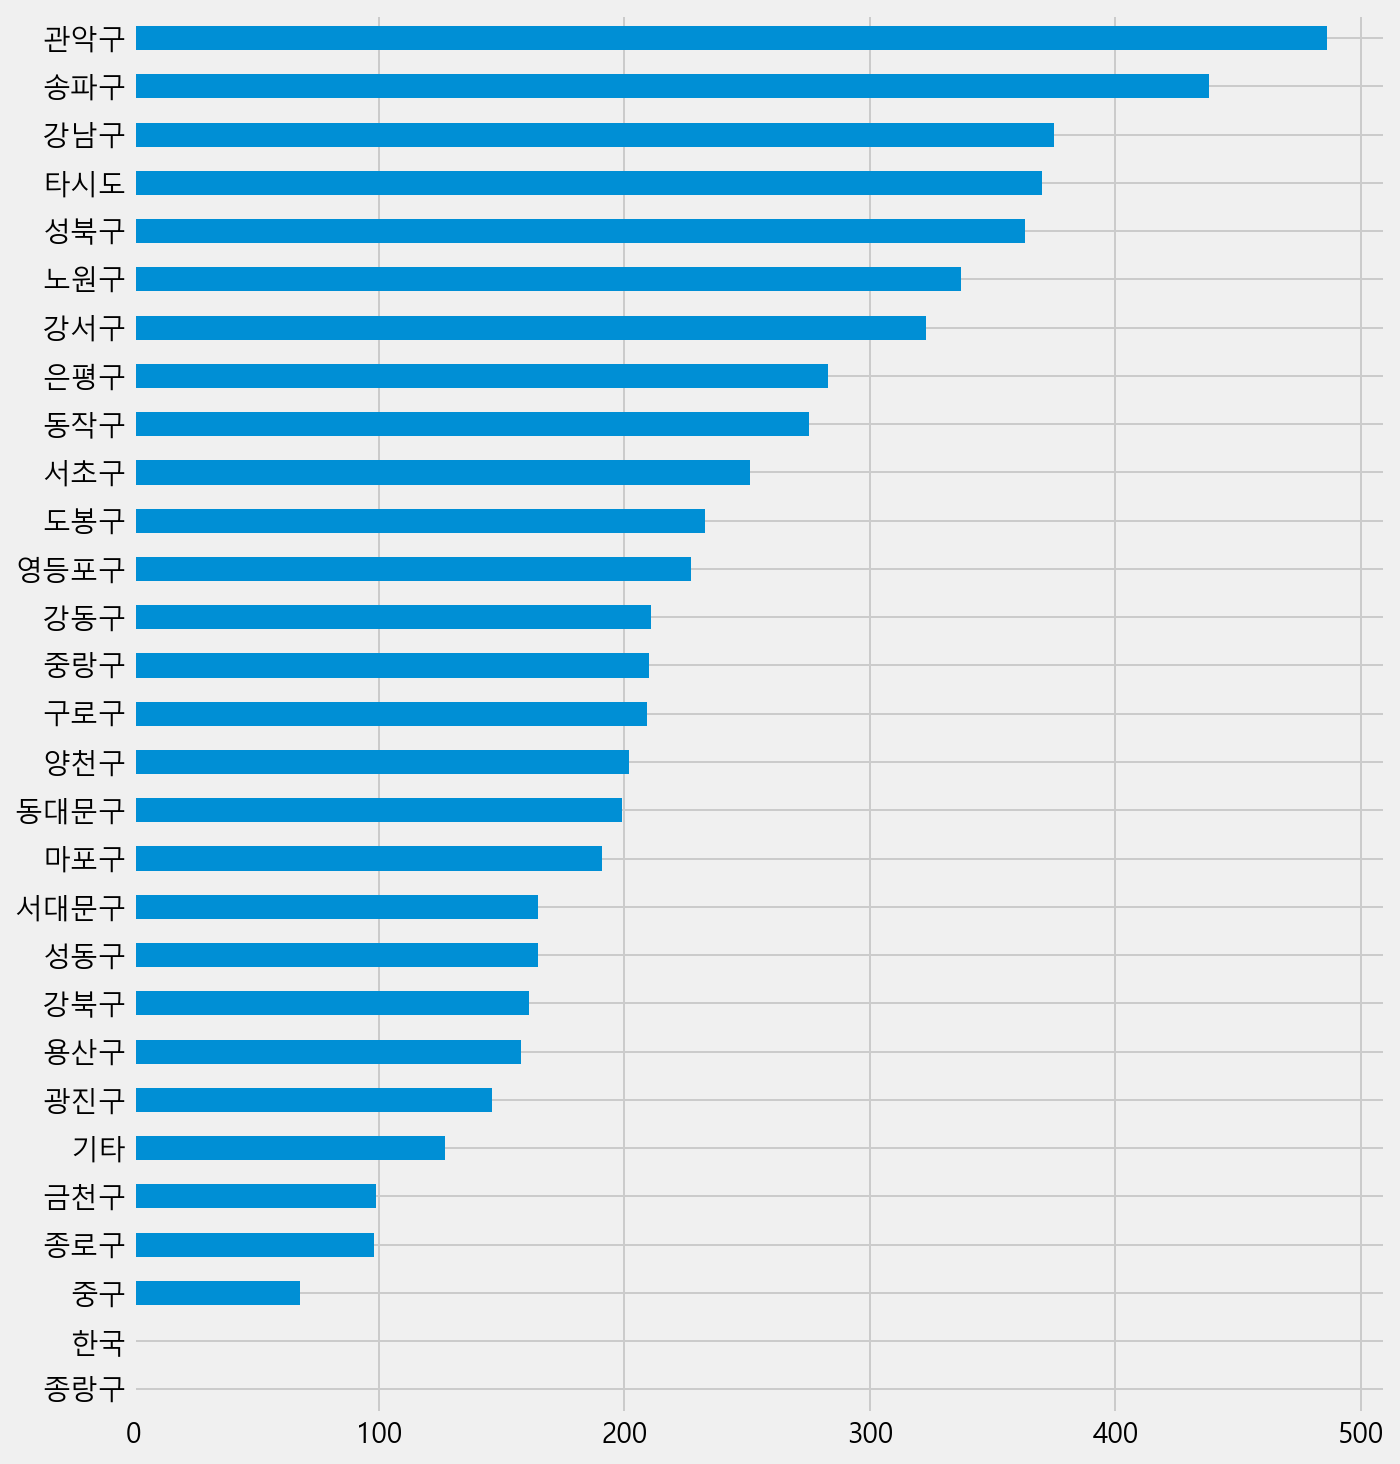

In [69]:
# 판다스에서는 index 값이 보통 x축으로 들어가고 y축에 값이 들어간다
# 그냥 그리면 ascending으로 정렬되므로 sort_values를 해줬다
# sort_values는 데이터프레임이었다면 어떤 컬럼 기준인지 지정해줘야한다

gu_count.sort_values().plot.barh(figsize = (10,12))

In [70]:
df.loc[df['거주지'].str.contains('랑구'),'거주지'] = '중랑구'

In [71]:
df.loc[df['거주지'].str.contains('랑구'),'거주지'].unique()

array(['중랑구'], dtype=object)

#### 서울이 아닌 곳들을 없애주기 위해서 리스트를 만들어주고 isin을 활용해서 제거해주었다

In [72]:
df_gu = gu_count.reset_index()
df_gu.columns = ['구', '확진수']
df_gu.head()

,구,확진수
0,관악구,486
1,송파구,438
2,강남구,375
3,타시도,370
4,성북구,363


In [73]:
not_seoul = ['한국', '타시도', '종랑구', '기타']

In [74]:
seoul = df_gu[~df_gu['구'].isin(not_seoul)]
seoul.head()

,구,확진수
0,관악구,486
1,송파구,438
2,강남구,375
4,성북구,363
5,노원구,337


In [75]:
df.loc[~df['거주지'].isin(not_seoul),'지역'] = df['거주지']
df['지역'] = df['지역'].fillna('타지역')
df['지역'].unique()

array(['강동구', '서초구', '용산구', '서대문구', '은평구', '성동구', '송파구', '타지역', '양천구',
       '강서구', '동대문구', '강남구', '도봉구', '영등포구', '마포구', '동작구', '금천구', '성북구',
       '강북구', '광진구', '중구', '관악구', '노원구', '중랑구', '종로구', '구로구'],
      dtype=object)

#### 익명함수로 지역 만들기 실습

In [76]:
# 컬럼 지우는 방법

del df['지역']

In [77]:
# 새로운 '지역'컬럼을 만들어줄 때 익명함수를 써줄 수 있다
# 조건 거는 방법 : if, else를 쓰자

df['지역'] = df['거주지'].map(lambda x: '타지역' if x in not_seoul else x)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN,2020-11-08,11,45,11-08,서초구
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN,2020-11-08,11,45,11-08,용산구
3,6369,27506,11.08.,서대문구,-,타시도 확진자 접촉,NaN,2020-11-08,11,45,11-08,서대문구
4,6368,27507,11.08.,은평구,-,타시도 확진자 접촉,NaN,2020-11-08,11,45,11-08,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...
6367,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
6368,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
6369,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
6370,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [78]:
df[['거주지','지역']].head()

,거주지,지역
0,강동구,강동구
1,서초구,서초구
2,용산구,용산구
3,서대문구,서대문구
4,은평구,은평구


In [79]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구


In [80]:
district = df['지역'].value_counts()
district = district.to_frame()
district.head(1)

,지역
타지역,498


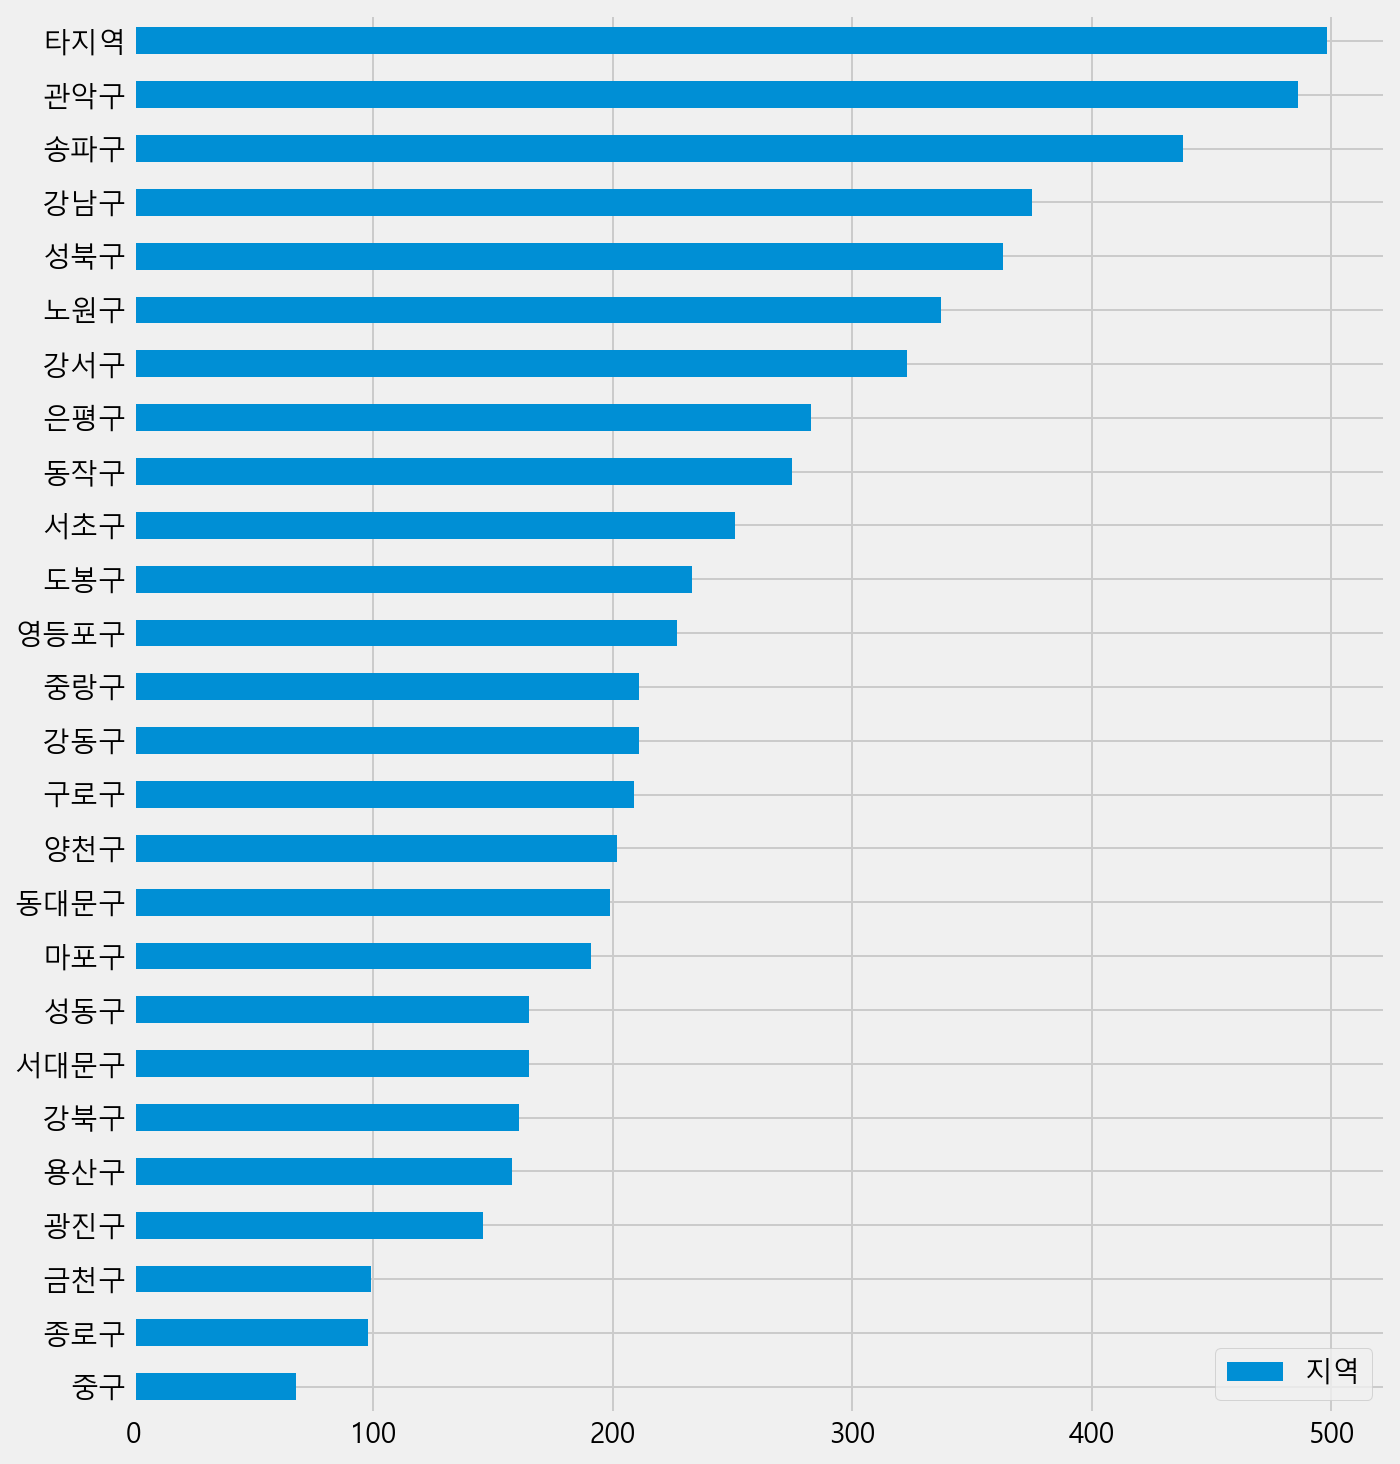

In [81]:
# 여기는 데이터프레임을 가지고 그리는 bar graph여서 sort_values할 때 컬럼명을 꼭 지정해줘야 한다

district.sort_values(by='지역').plot.barh(figsize = (10,12))

### 접촉력 분석하기

In [82]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN,2020-11-08,11,45,11-08,서초구
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN,2020-11-08,11,45,11-08,용산구
3,6369,27506,11.08.,서대문구,-,타시도 확진자 접촉,NaN,2020-11-08,11,45,11-08,서대문구
4,6368,27507,11.08.,은평구,-,타시도 확진자 접촉,NaN,2020-11-08,11,45,11-08,은평구


In [83]:
df['접촉력'].value_counts().head()

기타 확진자 접촉        907
성북구 사랑제일교회 관련    641
확인 중             586
감염경로 조사중         465
해외 접촉 추정         404
Name: 접촉력, dtype: int64

In [84]:
df['접촉력'].unique()

array(['기타 확진자 접촉', '용산구 소재 의류업체', '감염경로 조사중', '타시도 확진자 접촉', '강남구 헬스장 관련',
       '서초구 빌딩 관련', '해외 유입', '강서구 가족 관련', '강남구 럭키사우나 관련', '용인시 동문골프 모임',
       '동대문구 에이스희망케어센터 관련', '강서구 보험회사 관련', '강남구 역삼역 관련', '성동구 노인요양시설 관련',
       '서울음악 교습 관련', '영등포구 증권회사 관련', '강서구 직장 관련', '종로구 녹음실 관련',
       '송파구 시장 관련', '송파구 소재 교회관련', '동대문구 한국산업인력공단', '송파구 소재 병원관련',
       '언론인 관련', '생일파티모임관련', '제주도 지인모임', '구로구 가족관련', '구로구 가족관련[부천무용학원관련]',
       '영등포구 가족 관련(송파구소재 건설현장]', '기타확진자 접촉', '송파구 잠언의료기[강남구CJ텔레닉스]',
       '은평구 방문교사 관련', '기타 확진자 접촉[경기도SRC재활병원]', '강남서초 지인모임',
       '도봉구 소재병원(힘찬병원)', '수도권 지인모임 Ⅱ', '중구 소재 콜센터', '수도권 지인모임 관련Ⅱ',
       '영등포구 가족관련[송파구소재건설현장)', '관악구 삼모스포렉스Ⅱ', '영등포구 가족관련', '서대문구 소재 장례식장',
       '부천무용학원관련[구로구 가족관련]', '강남구 CJ텔레닉스[잠언의료기]', '수도권 지인모임관련',
       '도봉구 예마루데이케어센터', '도봉구 다나병원', '강남구 CJ텔레닉스', '송파구 잠언의료기',
       '강남구 CJ텔레닉스 관련', '강동구 행복데이케어센터', '중랑구 이마트 상봉점', '해외 접촉 추정',
       '영등포구 방문판매업체 관련', '강남구 해냄세무회계', '동작구 가족관련', '관악구 식당관련', '영등포구 소모임',
       '송파구 서민국수', '중구 소재 빌딩 관련

In [85]:
# df.loc[조건, 컬럼]: 조건에 맞는 해당 컬럼만 불러온다
# df.loc[조건]: 조건에 맞는 모든 컬럼을 불러온다
# 확인중 과 확인 중 두 개로 나뉘어 있음

df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중', '확인중'], dtype=object)

In [86]:
# 값들을 불러와서 이름을 바꿔주는 것!

df.loc[df['접촉력'].str.contains('확인'),'접촉력'] = '확인 중'

In [87]:
df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중'], dtype=object)

In [88]:
# 위에 확인 중이 500명대인데 여기서는 값 이름들을 바꿔줬기 때문에 628명이 되었다

df['접촉력'].value_counts()

기타 확진자 접촉            907
성북구 사랑제일교회 관련        641
확인 중                 628
감염경로 조사중             465
해외 접촉 추정             404
                    ... 
강북구 확진자 접촉             1
광진구 확진자 접촉             1
강남구 CJ텔레닉스[잠언의료기]      1
수도권 지인모임관련             1
중랑구 서울의료원              1
Name: 접촉력, Length: 331, dtype: int64

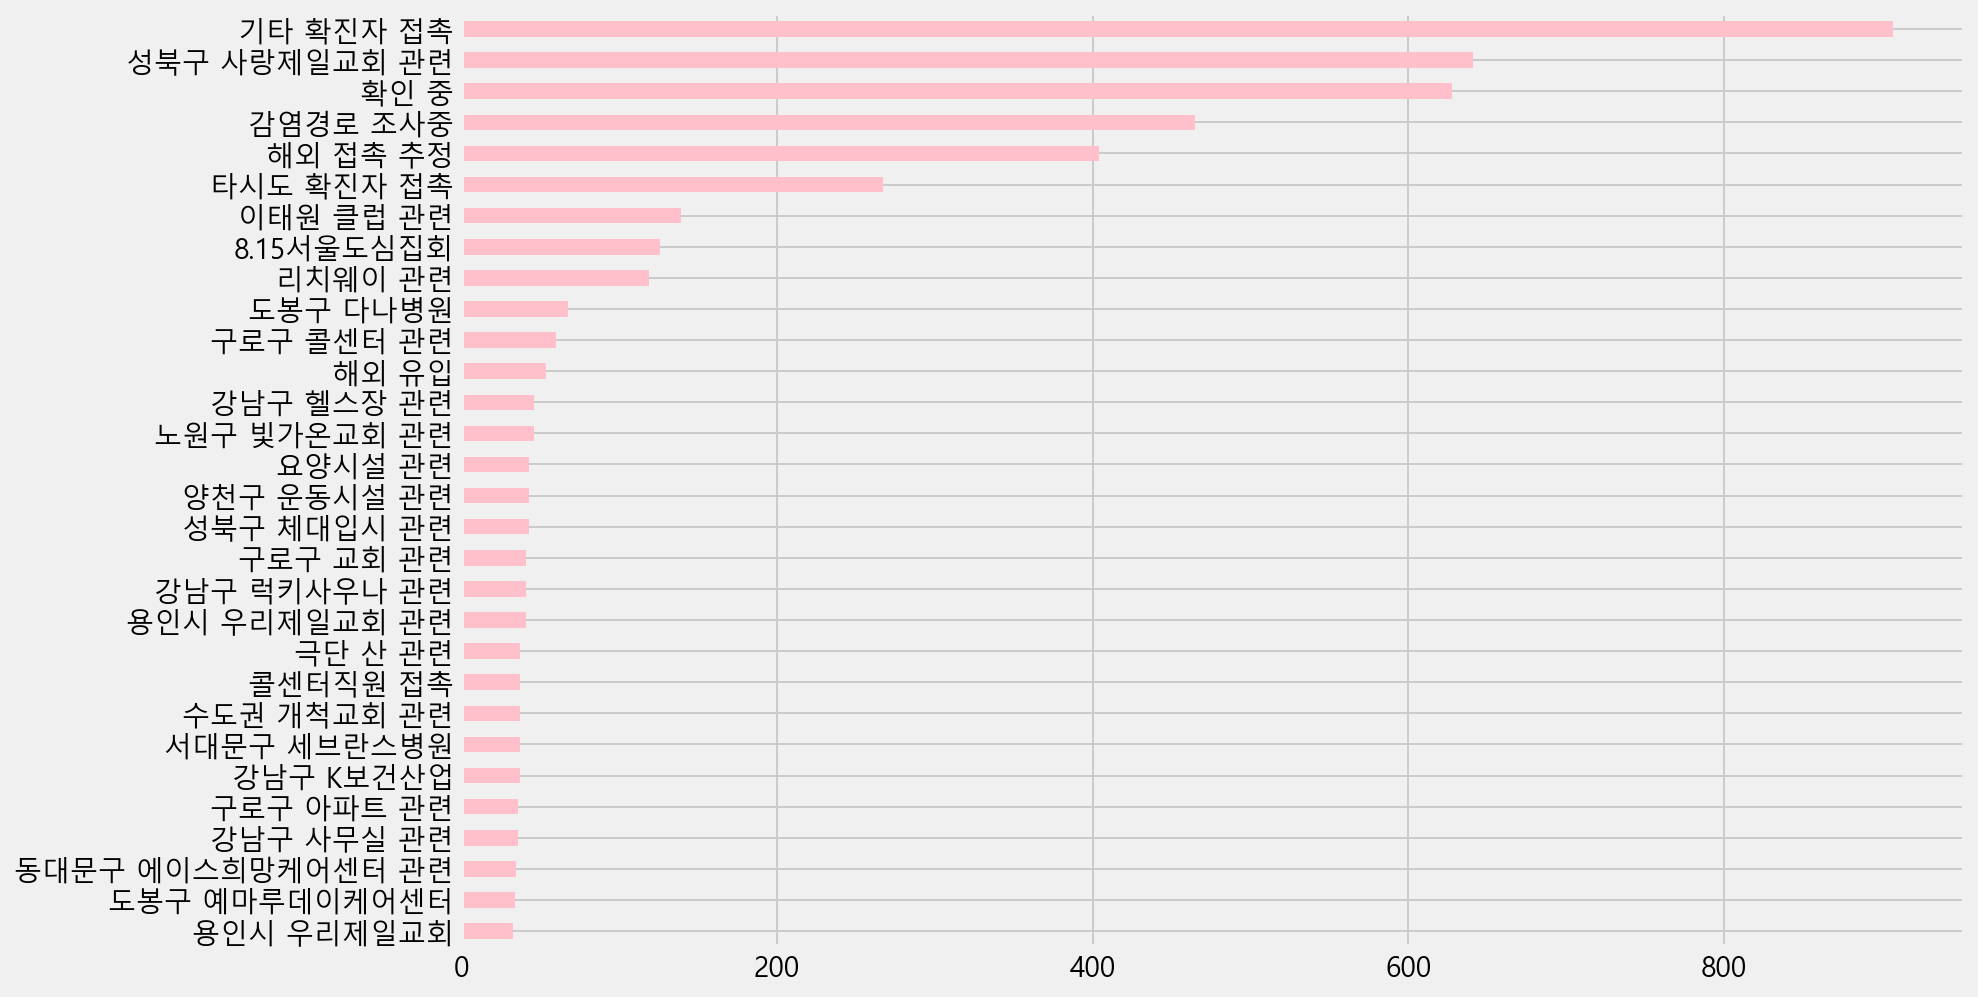

In [89]:
contact_count = df['접촉력'].value_counts()
contact_count[:30].sort_values().plot.barh(figsize =(12,8), color = 'pink')

#### 교회와 관련된 확진자 + 이태원 확진자의 비중을 알고 싶어서 아래와 같이 가져와봄

In [90]:
church = df.loc[df['접촉력'].str.contains('교회'), '접촉력'].value_counts().to_frame()
church.sum()

접촉력    1014
dtype: int64

In [91]:
total_counts = df['접촉력'].value_counts().sum()
church.sum() / total_counts *100

접촉력    15.913371
dtype: float64

In [92]:
# 조건을 두개 넣어서 가져오는 방법, 각 조건을 괄호로 처리해준다

df[df['접촉력'].str.contains('이태원')
  & (df['월'] == 6) ]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
5392,980,11785,6.06.,관악구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,관악구
5407,965,11742,6.06.,영등포구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,영등포구
5416,956,11751,6.06.,용산구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,용산구
5423,949,11709,6.05.,송파구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,송파구
5438,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
5496,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


### 월+접촉력 두 가지를 가지고 그래프 그리기

In [93]:
# top 50를 시리즈로 만들어주고, df에서 바로 isin을 써서 조건에 맞는 것들을 가져와서 데이터프레임을 만들었다

top_50 = contact_count[:50]
top_group = df[df['접촉력'].isin(top_50.index)]
top_group.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구


In [94]:
# unstack이라고 해주면 두 번째 인덱스가 가로로 이동한다
month_contact = top_group.groupby(['접촉력','월'])['연번'].count().unstack().fillna(0).astype(int)
month_contact.head(3)

월,1,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0
감염경로 조사중,0,0,0,0,0,0,0,10,284,125,46
강남구 K보건산업,0,0,0,0,0,0,0,0,37,0,0


### 접촉력이 확인 중인 데이터만 구하기

In [95]:
df_unknown = df[df['접촉력'] == '확인 중']
df_unknown.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
2414,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36,08-31,양천구
2415,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36,08-31,은평구
2416,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36,08-31,용산구


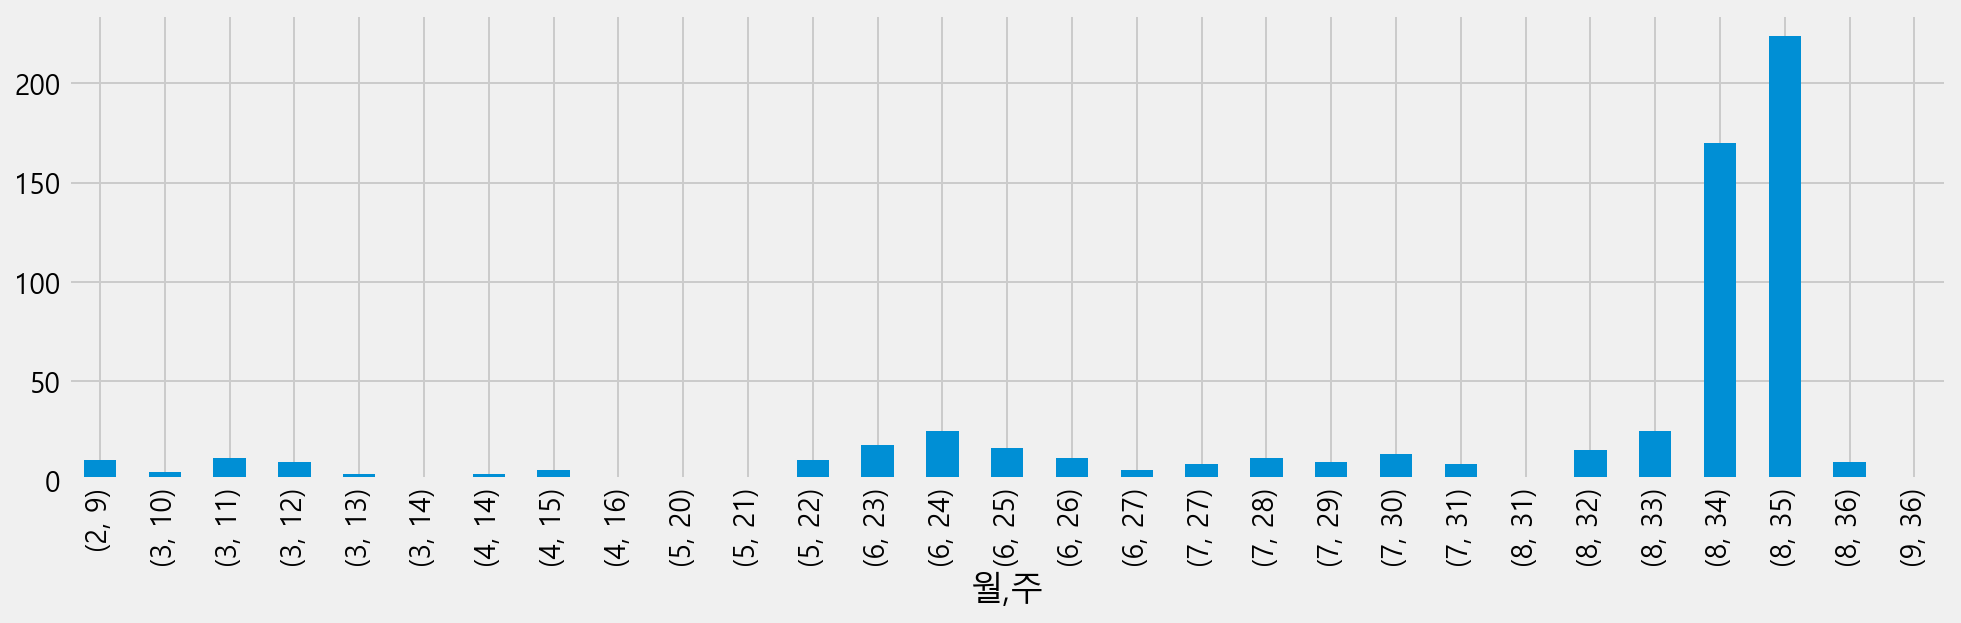

In [96]:
unknown_case = df_unknown.groupby(['월','주'])['연번'].count()
unknown_case.plot.bar(figsize = (15,4))

In [97]:
all_weekly_case = df['주'].value_counts().to_frame()
all_weekly_case.columns = ['전체확진수']
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [98]:
unknown_weekly_case = df_unknown['주'].value_counts().to_frame()
unknown_weekly_case.columns = ['불명확진수']

unknown_weekly_case

,불명확진수
35,224
34,170
24,25
33,25
23,18
25,16
32,15
30,13
27,13
11,11


In [99]:
# index를 기준으로 merge해주려고 하는 것이기 때문

unknown = all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)
unknown = unknown.sort_index()
unknown.head(3)

,전체확진수,불명확진수
9,62,10
10,37,4
11,124,11


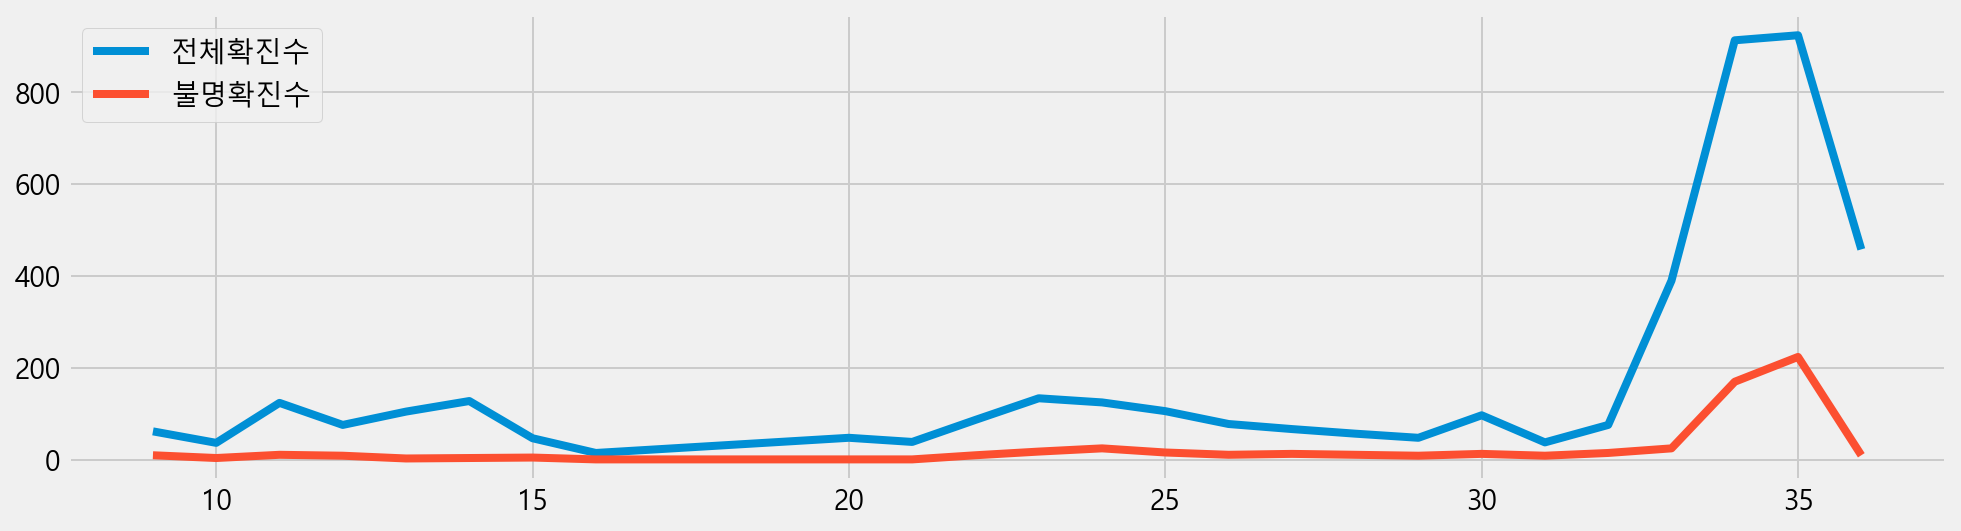

In [100]:
unknown.plot(figsize = (15,4))

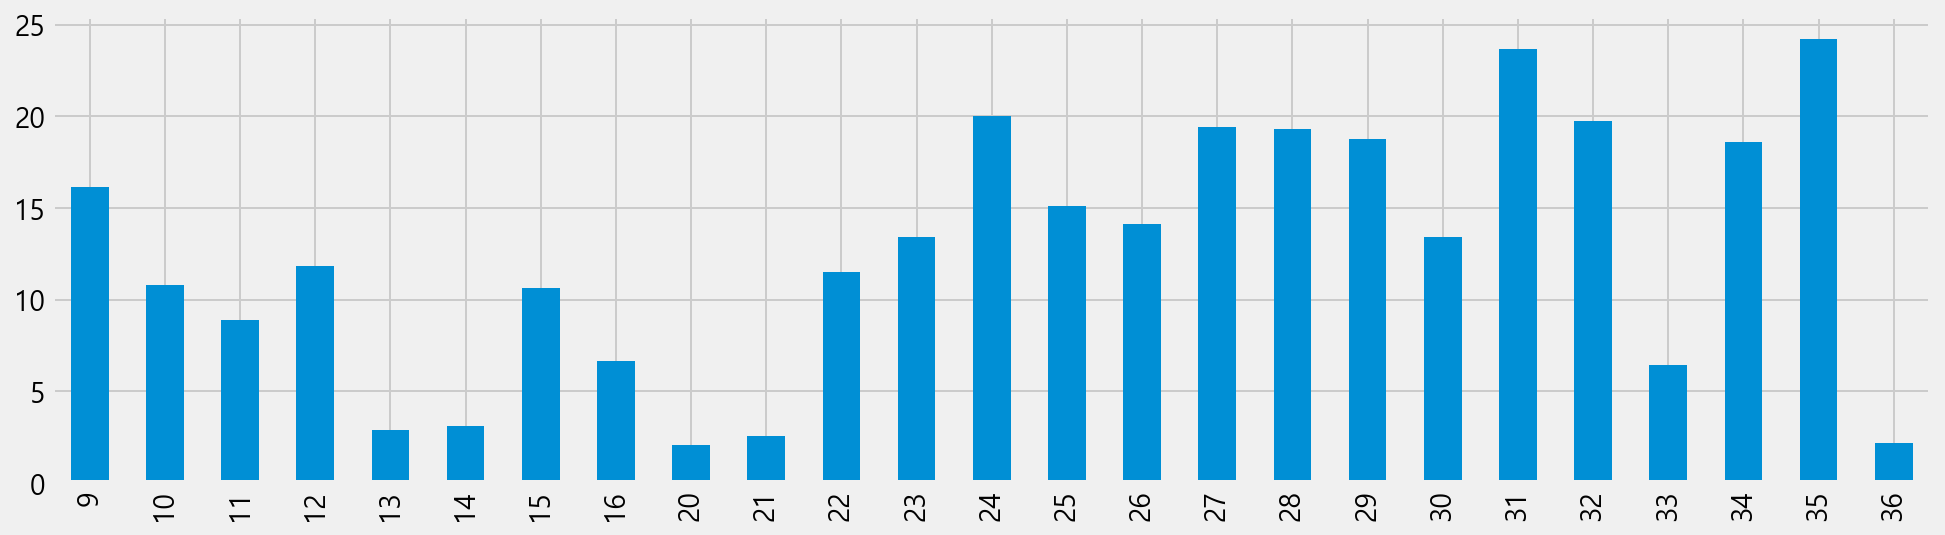

In [101]:
unknown['불명비중'] = unknown['불명확진수'] / unknown['전체확진수'] *100
unknown['불명비중'].plot.bar(figsize = (15,4))

### 정규표현식으로 가장 많이 전파시킨 사람 찾기
* re.sub("규칙","바꿀규칙","처리할 데이터")
* 규칙란에 들어갈 수 있는 경우는 : 
* [0-9] 0에서 9까지 숫자 하나를 포함하고 있는지
* [^ ] []안에 들어가는 것들은 포함하지 않아야 한다

In [102]:
# 정규표현식 쓸 수 있게 해주는 라이브러리
import re

In [103]:
df['접촉력'].unique()

array(['기타 확진자 접촉', '용산구 소재 의류업체', '감염경로 조사중', '타시도 확진자 접촉', '강남구 헬스장 관련',
       '서초구 빌딩 관련', '해외 유입', '강서구 가족 관련', '강남구 럭키사우나 관련', '용인시 동문골프 모임',
       '동대문구 에이스희망케어센터 관련', '강서구 보험회사 관련', '강남구 역삼역 관련', '성동구 노인요양시설 관련',
       '서울음악 교습 관련', '영등포구 증권회사 관련', '강서구 직장 관련', '종로구 녹음실 관련',
       '송파구 시장 관련', '송파구 소재 교회관련', '동대문구 한국산업인력공단', '송파구 소재 병원관련',
       '언론인 관련', '생일파티모임관련', '제주도 지인모임', '구로구 가족관련', '구로구 가족관련[부천무용학원관련]',
       '영등포구 가족 관련(송파구소재 건설현장]', '기타확진자 접촉', '송파구 잠언의료기[강남구CJ텔레닉스]',
       '은평구 방문교사 관련', '기타 확진자 접촉[경기도SRC재활병원]', '강남서초 지인모임',
       '도봉구 소재병원(힘찬병원)', '수도권 지인모임 Ⅱ', '중구 소재 콜센터', '수도권 지인모임 관련Ⅱ',
       '영등포구 가족관련[송파구소재건설현장)', '관악구 삼모스포렉스Ⅱ', '영등포구 가족관련', '서대문구 소재 장례식장',
       '부천무용학원관련[구로구 가족관련]', '강남구 CJ텔레닉스[잠언의료기]', '수도권 지인모임관련',
       '도봉구 예마루데이케어센터', '도봉구 다나병원', '강남구 CJ텔레닉스', '송파구 잠언의료기',
       '강남구 CJ텔레닉스 관련', '강동구 행복데이케어센터', '중랑구 이마트 상봉점', '해외 접촉 추정',
       '영등포구 방문판매업체 관련', '강남구 해냄세무회계', '동작구 가족관련', '관악구 식당관련', '영등포구 소모임',
       '송파구 서민국수', '중구 소재 빌딩 관련

In [104]:
def get_numbers(text):
    return re.sub('[^0-9]','', text)

get_numbers('#7500 접촉(추정)')

'7500'

In [105]:
df['접촉번호'] = df['접촉력'].map(get_numbers) # map은 함수를 적용해주는 기능을 한다
df.tail(3) # 아래 df를 출력해보면 접촉번호가 없는 환자들도 있는 것을 볼 수 있음

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
6369,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3
6370,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,
6371,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,2020-01-24,1,4,01-24,강서구,


In [106]:
contact = df['접촉번호'].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,6153
1,815,126
2,6,4
3,9,4
4,9734,4


In [107]:
df_contact = contact.drop(0) # 0번째 행을 없애줘!
df_contact = df_contact.head(10)

##### 오케이, 여기까지는 알았어! 그런데 나는 슈퍼전파자한테 전파당한 사람들을 다 알고싶어! 할때는 isin을 활용하자!

In [108]:
super_spread = df_contact['index']
super_spread

1       815
2         6
3         9
4      9734
5       780
6     14483
7      8791
8      8486
9      8271
10      794
Name: index, dtype: object

In [109]:
df[df['접촉번호'].isin(super_spread)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
1412,4960,22951,9.19.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-19,9,38,09-19,송파구,9
1479,4893,22755,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1480,4892,22756,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1481,4891,22757,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1698,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
6355,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,종로구,6
6362,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
6365,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,종로구,6


### 퇴원/사망현황 분석

In [110]:
df['퇴원현황'].unique()

array([nan, '퇴원', '사망'], dtype=object)

In [111]:
df['퇴원현황'].value_counts()

퇴원    5606
사망      78
Name: 퇴원현황, dtype: int64

In [112]:
df['퇴원'] = df['퇴원현황'].str.contains('퇴원')
df['사망'] = df['퇴원현황'].str.contains('사망')
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구,,NaN,NaN
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN,2020-11-08,11,45,11-08,서초구,,NaN,NaN
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN,2020-11-08,11,45,11-08,용산구,,NaN,NaN


In [113]:
# 이 데이터에서 퇴원/사망 아니면 다 NaN으로 처리돼서 연산이 불가하다
# 따라서 NaN을 '치료중'으로 바꿔주었음

df['퇴원'] = df['퇴원'].fillna('치료중')

In [114]:
df['사망'] = df['사망'].fillna('치료중')
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구,,치료중,치료중
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN,2020-11-08,11,45,11-08,서초구,,치료중,치료중
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN,2020-11-08,11,45,11-08,용산구,,치료중,치료중


In [115]:
# 퇴원하지 못한 사람은 688명
df['퇴원'].value_counts()

True     5606
치료중       688
False      78
Name: 퇴원, dtype: int64

In [116]:
# normalize하면 비중을 구해준다
df['퇴원'].value_counts(normalize = True)

True     0.879787
치료중      0.107972
False    0.012241
Name: 퇴원, dtype: float64

In [117]:
df['사망'].value_counts(normalize = True)

False    0.879787
치료중      0.107972
True     0.012241
Name: 사망, dtype: float64

In [118]:
# 현재까지 입원중인 사람 중에 가장 오래 입원해있는 사람
# 제일 오래 입원중인 사람 3명을 불러오기

df[(df['퇴원'] == '치료중') & (df['사망']=='치료중')].tail(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
3781,2591,16415,8.20.,노원구,-,성북구 사랑제일교회 관련,NaN,2020-08-20,8,34,08-20,노원구,,치료중,치료중
3849,2523,16655,8.20.,도봉구,-,확인 중,NaN,2020-08-20,8,34,08-20,도봉구,,치료중,치료중
4084,2288,15980,8.18.,동대문구,-,마포구 푸본생명콜센터,NaN,2020-08-18,8,34,08-18,동대문구,,치료중,치료중


### 교회를 통해 전파된 경우 파악하기

In [119]:
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
0,6372,27517,11.08.,강동구,-,기타 확진자 접촉,NaN,2020-11-08,11,45,11-08,강동구,,치료중,치료중
1,6371,27516,11.08.,서초구,-,용산구 소재 의류업체,NaN,2020-11-08,11,45,11-08,서초구,,치료중,치료중
2,6370,27515,11.08.,용산구,-,감염경로 조사중,NaN,2020-11-08,11,45,11-08,용산구,,치료중,치료중


In [137]:
df['교회'] = df.loc[df['접촉력'].str.contains('교회'), '접촉력']
# 고양시 반석교회가 다 다른 이름으로 들어가있음
df['교회'].unique()

array([nan, '송파구 소재 교회관련', '관악구 큰믿음유신감리교회', '강북구 북서울 꿈의교회', '송파구 우리교회',
       '노원구 빛가온교회 관련', '성북구 사랑제일교회 관련', '영등포구 권능교회', '용인시 우리제일교회 관련',
       '성북구 벧엘장로교회', '여의도 순복음교회 관련', '양천구 되새김교회 관련', '고양시 반석교회',
       '용인시 우리제일교회', '양천구 되새김 교회', '양천구 되새김교회', '선교회 소모임', '송파구 교회관련',
       '왕성교회 관련', '대전 꿈꾸는 교회', '수도권 개척교회 관련', '한국대학생선교회 관련',
       '강남구 동인교회 관련', '구로구 교회 관련', '명성교회 관련', '신천지대구교회 관련'], dtype=object)

In [138]:
# 접촉력에서 '반석'을 포함하는 컬럼을 불러오고, 이를 고양시 반석교회로 바꿨음
# df.loc으로 바꿔주면 바로 적용된다, 이를 다시 df에 할당하지 않도록 주의하자! (df의 해당 컬럼 모든 값이 바뀔 수 있다)
df.loc[df['접촉력'].str.contains('반석'),'접촉력'] = '고양시 반석교회'
df.loc[df['접촉력'].str.contains('명성'), '접촉력'] = '명성교회 관련'
df['교회'].unique()

array([nan, '송파구 소재 교회관련', '관악구 큰믿음유신감리교회', '강북구 북서울 꿈의교회', '송파구 우리교회',
       '노원구 빛가온교회 관련', '성북구 사랑제일교회 관련', '영등포구 권능교회', '용인시 우리제일교회 관련',
       '성북구 벧엘장로교회', '여의도 순복음교회 관련', '양천구 되새김교회 관련', '고양시 반석교회',
       '용인시 우리제일교회', '양천구 되새김 교회', '양천구 되새김교회', '선교회 소모임', '송파구 교회관련',
       '왕성교회 관련', '대전 꿈꾸는 교회', '수도권 개척교회 관련', '한국대학생선교회 관련',
       '강남구 동인교회 관련', '구로구 교회 관련', '명성교회 관련', '신천지대구교회 관련'], dtype=object)

In [141]:
# top은 문자 데이터중에서 제일 빈도수가 높은 것을 보여준다

df['교회'].describe()

count              1014
unique               25
top       성북구 사랑제일교회 관련
freq                641
Name: 교회, dtype: object

In [166]:
# 상위 5개 슈퍼전파 교회에 대해서 index로 컬럼화해주었다
# 아래쪽에서 loc의 컬럼 조건부분에 넣을 수 있음 -> index 없이 바로 해버리면 오류남! 리스트화 해줘야 한다
top_church = df['교회'].value_counts().head(5).index
top_church 

Index(['성북구 사랑제일교회 관련', '노원구 빛가온교회 관련', '용인시 우리제일교회 관련', '구로구 교회 관련',
       '수도권 개척교회 관련'],
      dtype='object')

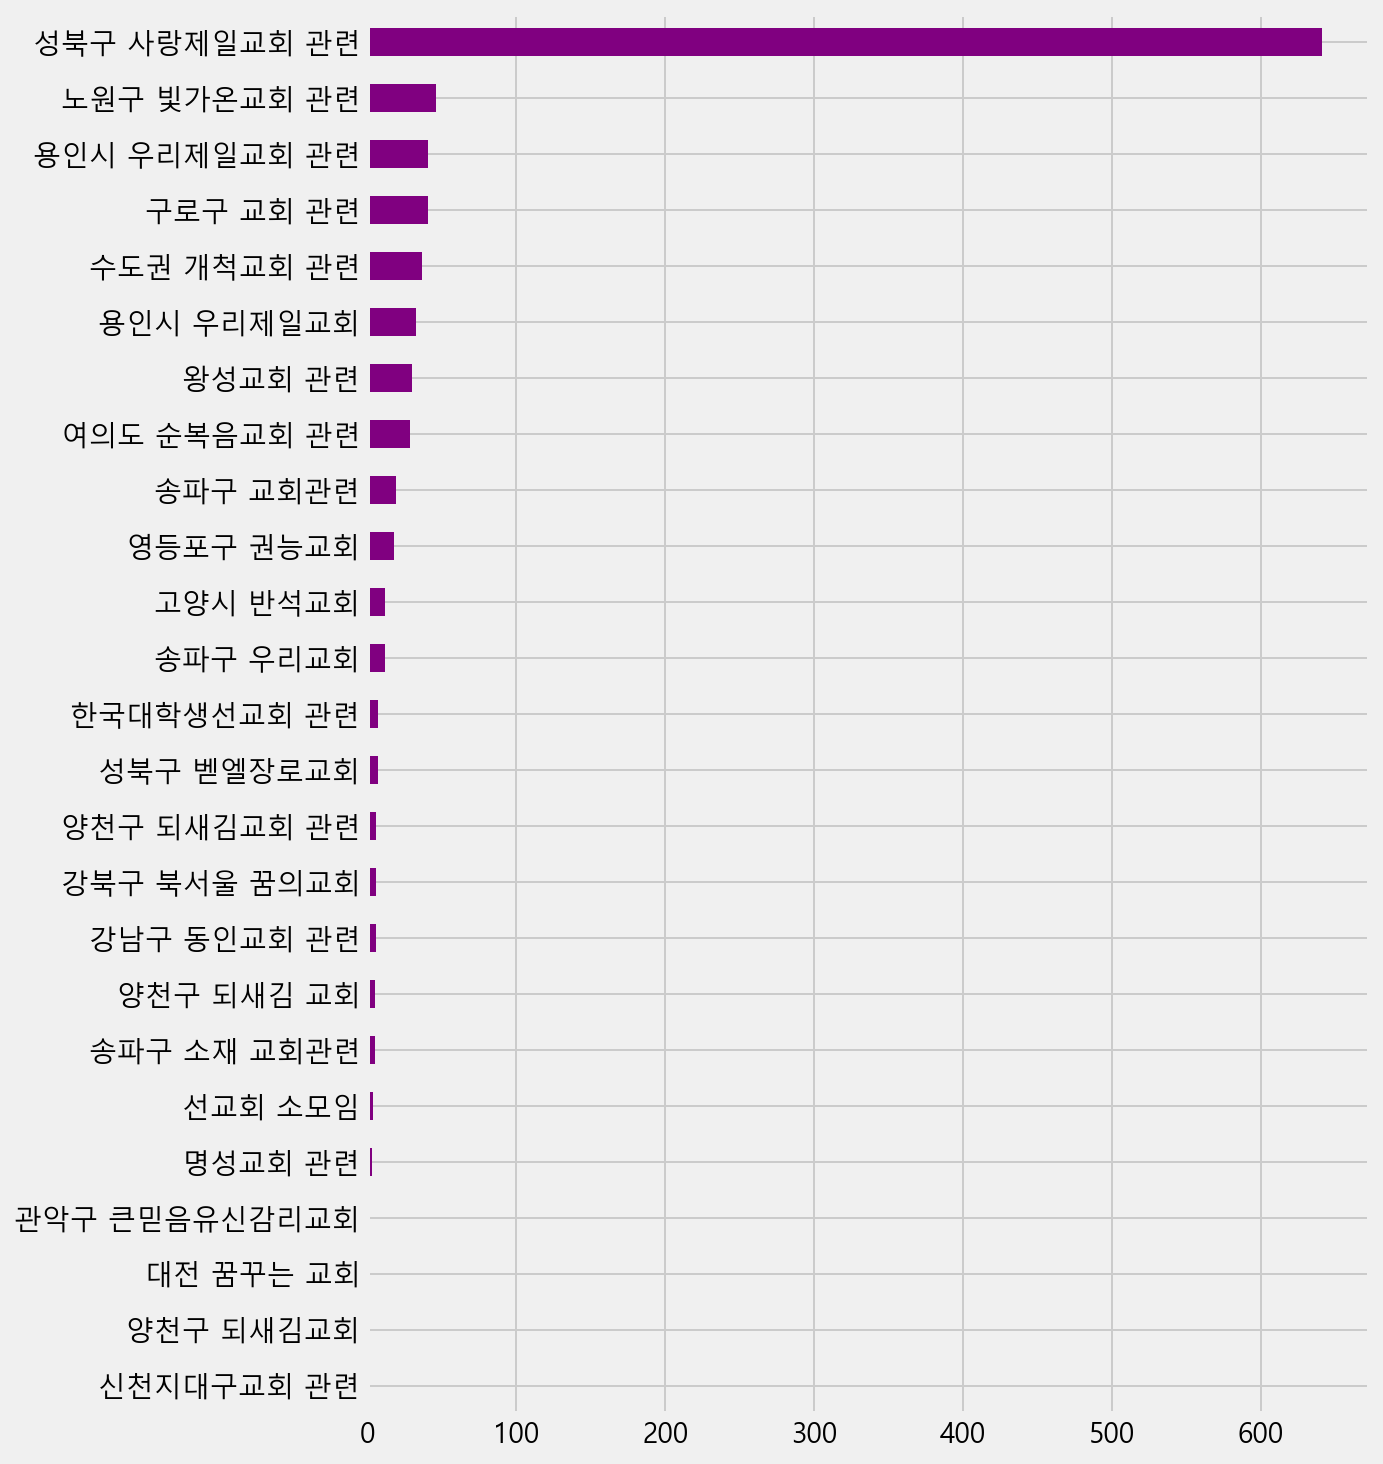

In [148]:
church_count = df['교회'].value_counts()
church_count.sort_values().plot.barh(figsize=(8,12), color = 'purple')

In [151]:
church_gu = df.groupby(['지역','교회'])['연번'].count().unstack()
church_gu.head()

교회,강남구 동인교회 관련,강북구 북서울 꿈의교회,고양시 반석교회,관악구 큰믿음유신감리교회,구로구 교회 관련,노원구 빛가온교회 관련,대전 꿈꾸는 교회,명성교회 관련,선교회 소모임,성북구 벧엘장로교회,...,신천지대구교회 관련,양천구 되새김 교회,양천구 되새김교회,양천구 되새김교회 관련,여의도 순복음교회 관련,영등포구 권능교회,왕성교회 관련,용인시 우리제일교회,용인시 우리제일교회 관련,한국대학생선교회 관련
지역,,,,,,,,,,,,,,,,,,,,,
강남구,1.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,2.0,NaN
강동구,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
강북구,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
강서구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,2.0,3.0,NaN,NaN,2.0,2.0,2.0
관악구,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,18.0,1.0,1.0,NaN


In [157]:
# iloc를 활용해서 행, 열 모두 앞에서 8개까지 가져오기

church_gu.fillna(0).iloc[:8,:8]

교회,강남구 동인교회 관련,강북구 북서울 꿈의교회,고양시 반석교회,관악구 큰믿음유신감리교회,구로구 교회 관련,노원구 빛가온교회 관련,대전 꿈꾸는 교회,명성교회 관련
지역,,,,,,,,
강남구,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
강동구,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
강북구,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
강서구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
관악구,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0
광진구,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
구로구,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
금천구,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


### loc와 iloc 구분

#### loc는 행과 컬럼 모두 정확한 이름을 호출해서 불러와야 한다!

In [162]:
church_gu.loc[['강남구','강서구'],'성북구 사랑제일교회 관련']

지역
강남구    15.0
강서구    13.0
Name: 성북구 사랑제일교회 관련, dtype: float64

In [167]:
# 상위 5개 슈퍼전파 교회를 컬럼 조건으로 가져왔다

church_gu.loc[['성동구','성북구'], top_church]

,성북구 사랑제일교회 관련,노원구 빛가온교회 관련,용인시 우리제일교회 관련,구로구 교회 관련,수도권 개척교회 관련
지역,,,,,
성동구,4.0,NaN,2.0,NaN,NaN
성북구,142.0,NaN,NaN,NaN,NaN


#### 데이터 타입 바꿀 때 astype

### 히트맵 그리는 방법
* 특정 값만 불러오려면 데이터프레임 옆에 [ ]로 원하는 내용 가져오기

In [181]:
church_gu_heatmap = church_gu.fillna(0).astype(int)

# 상위 5개 슈퍼전파 교회에 대해서 리스트화 해놓은 값만 가져옴
# 컬러 코드는 무조건 'Reds', "Purples" 이런식으로 정해져있음
# T.style은 행 열 피봇팅
church_gu_heatmap[top_church].T.style.background_gradient(cmap = 'Purples')

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
교회,,,,,,,,,,,,,,,,,,,,,,,,,,
성북구 사랑제일교회 관련,15,22,33,13,14,20,7,5,82,24,24,21,18,12,8,4,142,43,7,6,10,31,5,12,24,39
노원구 빛가온교회 관련,0,0,0,0,0,0,0,0,43,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
용인시 우리제일교회 관련,2,10,2,2,1,1,0,1,0,0,1,1,0,0,1,2,0,10,0,3,1,0,0,0,1,2
구로구 교회 관련,6,2,0,0,9,1,3,3,0,0,0,1,0,1,4,0,0,1,2,2,2,0,0,0,0,4
수도권 개척교회 관련,1,0,0,7,2,0,8,0,0,0,0,0,1,2,0,0,0,0,12,3,0,0,0,0,0,1


### 여행력 살펴보기
* 계산이 복잡해져서 원 데이터 손실을 막기 위해서 "해외" 컬럼을 새로 생성해줬다
* 해외 접촉자들과 관련하여 여러 데이터 시각화를 하기 위해서 df[df['해외'].notnull()]로 해외접촉력 있는 행들만 새로 불러옴

In [186]:
df['여행력'].value_counts()

-                   5892
미국                   156
영국                    50
필리핀                   25
우즈베키스탄                15
                    ... 
이탈리아, 독일, 홍콩           1
아르헨티나, 볼리비아, 브라질       1
21263                  1
가나                     1
중국 청도                  1
Name: 여행력, Length: 87, dtype: int64

In [202]:
df['해외'] = df['여행력']
df['해외'].str.strip() #문자열 데이터를 다룰 때는 앞뒤로 공백을 없애주기
df['해외'] = df['해외'].replace('-', np.nan) # replace할 때, 완벽하게 같으면 그냥, 아니라면 str.replace
df['해외'].unique() #nunique하면 unique값을 세어줌

array([nan, '사우디아라비아', '프랑스', '가나', '미국', '튀니지', '이탈리아', '러시아', '아랍에미리트',
       '우즈베키스탄', '독일', '네팔', '방글라데시', '에디오피아', '네덜란드', '키르기스스탄', '인도',
       '이란', '체코', '폴란드', '필리핀', '일본', '브라질', '요르단', '쿠웨이트', '인도네시아',
       '우간다', '몰타', '영국', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코, 미국', '카자흐스탄', '중국', '이집트', '21263', '터키', '베트남', '에티오피아',
       '스페인', '케냐', '멕시코', '홍콩', '이라크', '모로코, 터키', '나이지리아', '미국, 멕시코',
       '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'], dtype=object)

In [200]:
df['해외'].describe()

count     480
unique     86
top        미국
freq      156
Name: 해외, dtype: object

In [205]:
df['해외'].value_counts().head(10)

미국        156
영국         50
필리핀        25
우즈베키스탄     15
프랑스        14
인도         13
스페인        12
일본         10
카자흐스탄      10
이라크        10
Name: 해외, dtype: int64

In [213]:
df_oversea = df[df['해외'].notnull()]
df_oversea # 다른 컬럼까지있는 전체 데이터중에 해외접촉인 것들을 불러와서 새로운 데이터프레임을 형성해줬음

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,교회,해외
110,6262,27239,11.06.,기타,사우디아라비아,해외 유입,NaN,2020-11-06,11,45,11-06,타지역,,치료중,치료중,NaN,사우디아라비아
121,6251,27224,11.06.,성동구,프랑스,해외 유입,NaN,2020-11-06,11,45,11-06,성동구,,치료중,치료중,NaN,프랑스
134,6238,27211,11.06.,서대문구,가나,해외 유입,NaN,2020-11-06,11,45,11-06,서대문구,,치료중,치료중,NaN,가나
148,6224,27144,11.05.,송파구,미국,해외 유입,NaN,2020-11-05,11,45,11-05,송파구,,치료중,치료중,NaN,미국
176,6196,27073,11.05.,용산구,튀니지,해외 유입,NaN,2020-11-05,11,45,11-05,용산구,,치료중,치료중,NaN,튀니지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,9,19,2.5.,송파구,싱가포르,해외 접촉,퇴원,2020-02-05,2,6,02-05,송파구,,True,False,NaN,싱가포르
6364,8,13,2.2.,타시도,우한 교민,해외 접촉,퇴원,2020-02-02,2,5,02-02,타지역,,True,False,NaN,우한 교민
6368,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False,NaN,중국 우한시
6370,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False,NaN,중국 우한시


In [211]:
df_oversea['해외'].unique()

array(['사우디아라비아', '프랑스', '가나', '미국', '튀니지', '이탈리아', '러시아', '아랍에미리트',
       '우즈베키스탄', '독일', '네팔', '방글라데시', '에디오피아', '네덜란드', '키르기스스탄', '인도',
       '이란', '체코', '폴란드', '필리핀', '일본', '브라질', '요르단', '쿠웨이트', '인도네시아',
       '우간다', '몰타', '영국', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코, 미국', '카자흐스탄', '중국', '이집트', '21263', '터키', '베트남', '에티오피아',
       '스페인', '케냐', '멕시코', '홍콩', '이라크', '모로코, 터키', '나이지리아', '미국, 멕시코',
       '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'], dtype=object)

* 국가를 한 개씩하면 너무 많고 중복된다
* str.contains( ) 를 쓰려면 괄호 안에 string 타입이 들어가야하니까 이 국가들을 변수에 string type으로 담아주고 "유럽"으로 변환함

In [219]:
europe = '체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드'
europe = europe.replace(', ', '|')
europe # |로 구분되게 만들었음
df_oversea[df_oversea['해외'].str.contains(europe)] #europe에 들어있는 국가 중 하나라도 여행력에 포함되면 True로 표시된다

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,교회,해외
121,6251,27224,11.06.,성동구,프랑스,해외 유입,NaN,2020-11-06,11,45,11-06,성동구,,치료중,치료중,NaN,프랑스
186,6186,27012,11.04.,기타,이탈리아,해외 유입,NaN,2020-11-04,11,45,11-04,타지역,,치료중,치료중,NaN,이탈리아
232,6140,26900,11.03.,기타,독일,해외 유입,NaN,2020-11-03,11,45,11-03,타지역,,치료중,치료중,NaN,독일
677,5695,25228,10.18.,용산구,체코,해외 유입,퇴원,2020-10-18,10,42,10-18,용산구,,True,False,NaN,체코
678,5694,25229,10.18.,용산구,체코,해외 유입,퇴원,2020-10-18,10,42,10-18,용산구,,True,False,NaN,체코
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,116,6999,3.7.,서초구,"스페인, 프랑스",해외 접촉,퇴원,2020-03-07,3,10,03-07,서초구,,True,False,NaN,"스페인, 프랑스"
6269,103,5666,3.4.,용산구,"이탈리아, 독일, 홍콩",해외 접촉,퇴원,2020-03-04,3,10,03-04,용산구,,True,False,NaN,"이탈리아, 독일, 홍콩"
6287,85,3681,2.29.,강남구,이탈리아,해외 접촉,퇴원,2020-02-29,2,9,02-29,강남구,,True,False,NaN,이탈리아
6297,75,2468,2.27.,강남구,"이탈리아, 프랑스",해외 접촉,퇴원,2020-02-27,2,9,02-27,강남구,,True,False,NaN,"이탈리아, 프랑스"


In [225]:
south_america = '브라질, 아르헨티나, 칠레, 볼리비아, 멕시코, 페루'
south_america = south_america.replace(', ','|')
south_america

'브라질|아르헨티나|칠레|볼리비아|멕시코|페루'

In [244]:
df_oversea.loc[df_oversea['해외'].str.contains(europe),'해외'] = '유럽'
df_oversea.loc[df_oversea['해외'].str.contains(south_america),'해외'] = '남미'
df_oversea.loc[df_oversea['해외'].str.contains('중국|우한'),'해외'] = '중국'
df_oversea.loc[df_oversea['해외'].str.contains('필리핀'),'해외'] = '필리핀'
df_oversea.loc[df_oversea['해외'].str.contains('아랍에미리트'),'해외'] = 'UAE'
df_oversea.loc[df_oversea['해외'].str.contains('미국'),'해외'] = '미국'
df_oversea.loc[df_oversea['해외'].str.contains('호주'),'해외'] = '인도네시아'
df_oversea['해외'].value_counts()

미국         158
유럽         117
필리핀         27
남미          23
우즈베키스탄      15
인도          13
카자흐스탄       10
일본          10
이라크         10
중국           9
인도네시아        8
태국           6
러시아          6
사우디아라비아      6
키르기스스탄       6
UAE          6
캐나다          5
방글라데시        5
네팔           4
파키스탄         4
베트남          3
팔라우          2
에콰도르         2
쿠웨이트         2
이집트          2
우크라이나        2
이란           1
카타르          1
파라과이         1
케냐           1
우간다          1
포르투칼         1
싱가포르         1
튀니지          1
에티오피아        1
홍콩           1
나이지리아        1
네덜란드         1
말레이시아        1
에디오피아        1
가나           1
요르단          1
몰타           1
21263        1
키르기즈스탄       1
Name: 해외, dtype: int64

### 해외접촉으로 agg 및 시각화

In [248]:
df_oversea = df_oversea.drop('south_america', axis = 1)
df_oversea

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,교회,해외
110,6262,27239,11.06.,기타,사우디아라비아,해외 유입,NaN,2020-11-06,11,45,11-06,타지역,,치료중,치료중,NaN,사우디아라비아
121,6251,27224,11.06.,성동구,프랑스,해외 유입,NaN,2020-11-06,11,45,11-06,성동구,,치료중,치료중,NaN,유럽
134,6238,27211,11.06.,서대문구,가나,해외 유입,NaN,2020-11-06,11,45,11-06,서대문구,,치료중,치료중,NaN,가나
148,6224,27144,11.05.,송파구,미국,해외 유입,NaN,2020-11-05,11,45,11-05,송파구,,치료중,치료중,NaN,미국
176,6196,27073,11.05.,용산구,튀니지,해외 유입,NaN,2020-11-05,11,45,11-05,용산구,,치료중,치료중,NaN,튀니지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,9,19,2.5.,송파구,싱가포르,해외 접촉,퇴원,2020-02-05,2,6,02-05,송파구,,True,False,NaN,싱가포르
6364,8,13,2.2.,타시도,우한 교민,해외 접촉,퇴원,2020-02-02,2,5,02-02,타지역,,True,False,NaN,중국
6368,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False,NaN,중국
6370,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False,NaN,중국


In [256]:
day_oversea = df_oversea.groupby(['확진일자','해외'])['연번'].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

#### groupby (level = [n])을 활용해서 그룹화해주기
* 그룹바이로 묶어준 데이터에 인덱스가 여러개 있을 때 level을 활용해주면 그룹을 한 번 더 해줄 수 있다

In [258]:
# 인덱스가 여러개일 때, level을 쓰면 된다, 두 번째 인덱스가 1번

day_oversea = day_oversea.groupby(level= [1]).cumsum()
day_oversea

확진일자        해외     
2020-01-24  중국           1
2020-01-30  중국           3
2020-02-02  중국           4
2020-02-05  싱가포르         1
2020-02-06  중국           5
                      ... 
2020-11-05  미국         158
            튀니지          1
2020-11-06  가나           1
            사우디아라비아      6
            유럽         117
Name: 연번, Length: 311, dtype: int64

In [285]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={'연번':'누적확진수'})
df_day_oversea.head(10)

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5
5,2020-02-07,중국,6
6,2020-02-23,베트남,1
7,2020-02-25,중국,7
8,2020-02-25,태국,1
9,2020-02-27,유럽,2


In [286]:
# 그래프를 그려줄 때, 위에 데이터로 바로 그리려고하면 index 기준으로 그려버려서 오류가 난다
# set_index(인덱스화할 컬럼)으로 바꿔줌

df_day_oversea = df_day_oversea.set_index('확진일자')
df_day_oversea

,해외,누적확진수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5
...,...,...
2020-11-05,미국,158
2020-11-05,튀니지,1
2020-11-06,가나,1


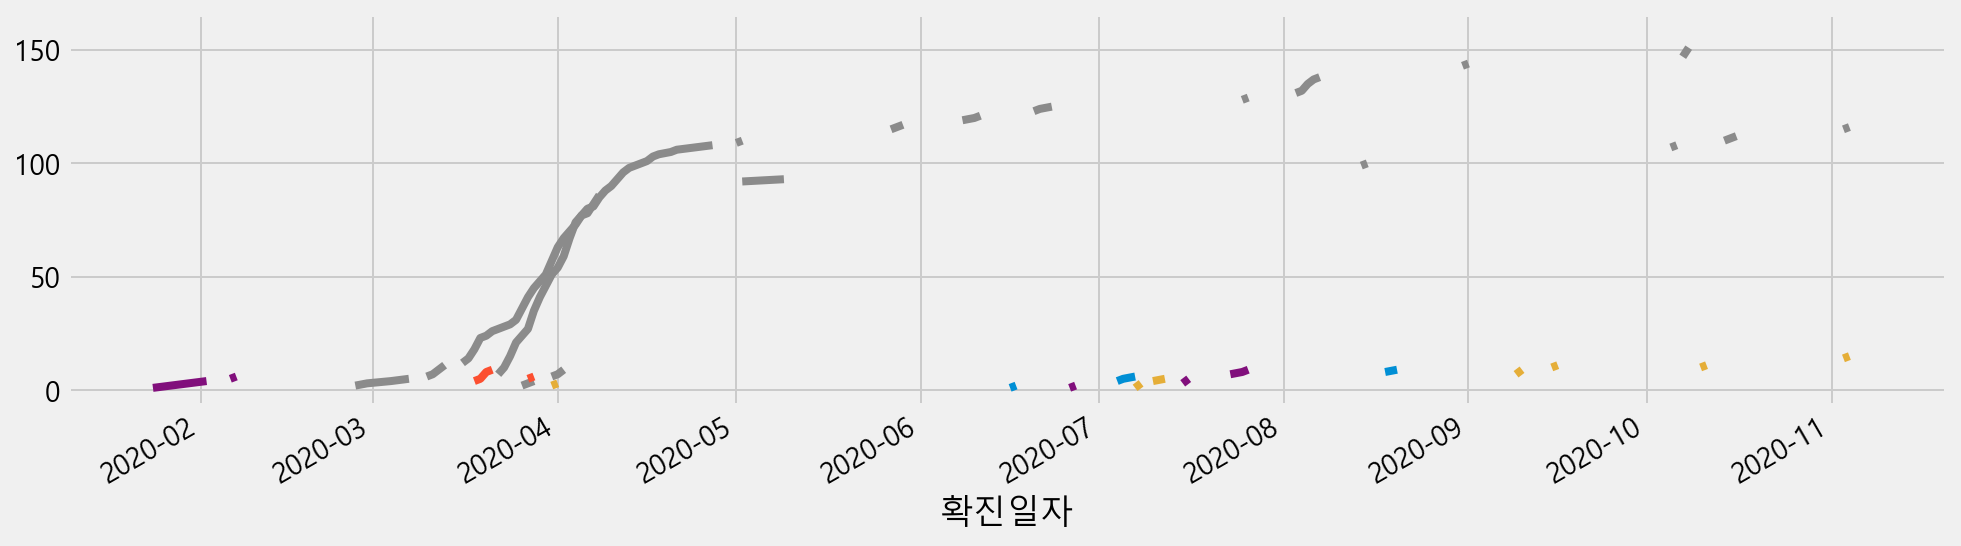

In [290]:
df_day_oversea.pivot(columns = '해외').plot(figsize = (15,4), legend = False)

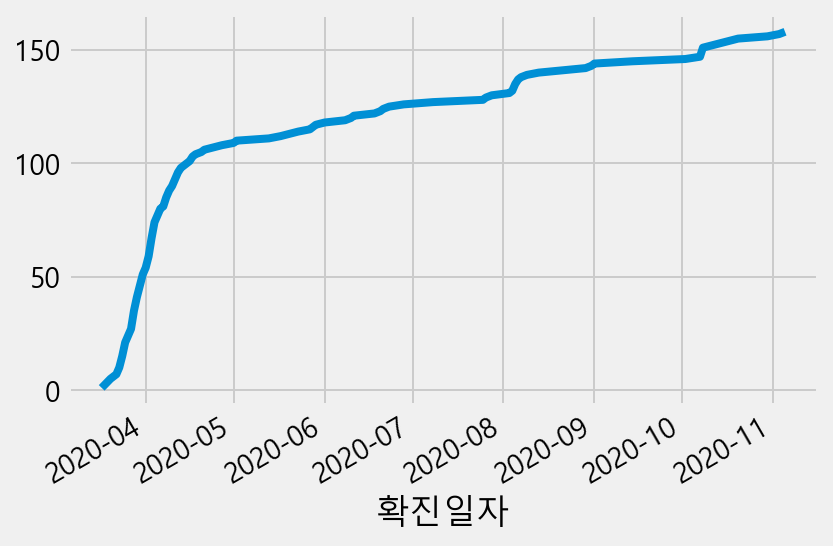

In [296]:
df_day_oversea.loc[df_day_oversea['해외'] == '미국', '누적확진수'].plot()

In [311]:
oversea_gu = df_oversea['지역'].value_counts()
oversea_gu.head(5)

타지역    61
강남구    49
용산구    32
마포구    30
송파구    30
Name: 지역, dtype: int64

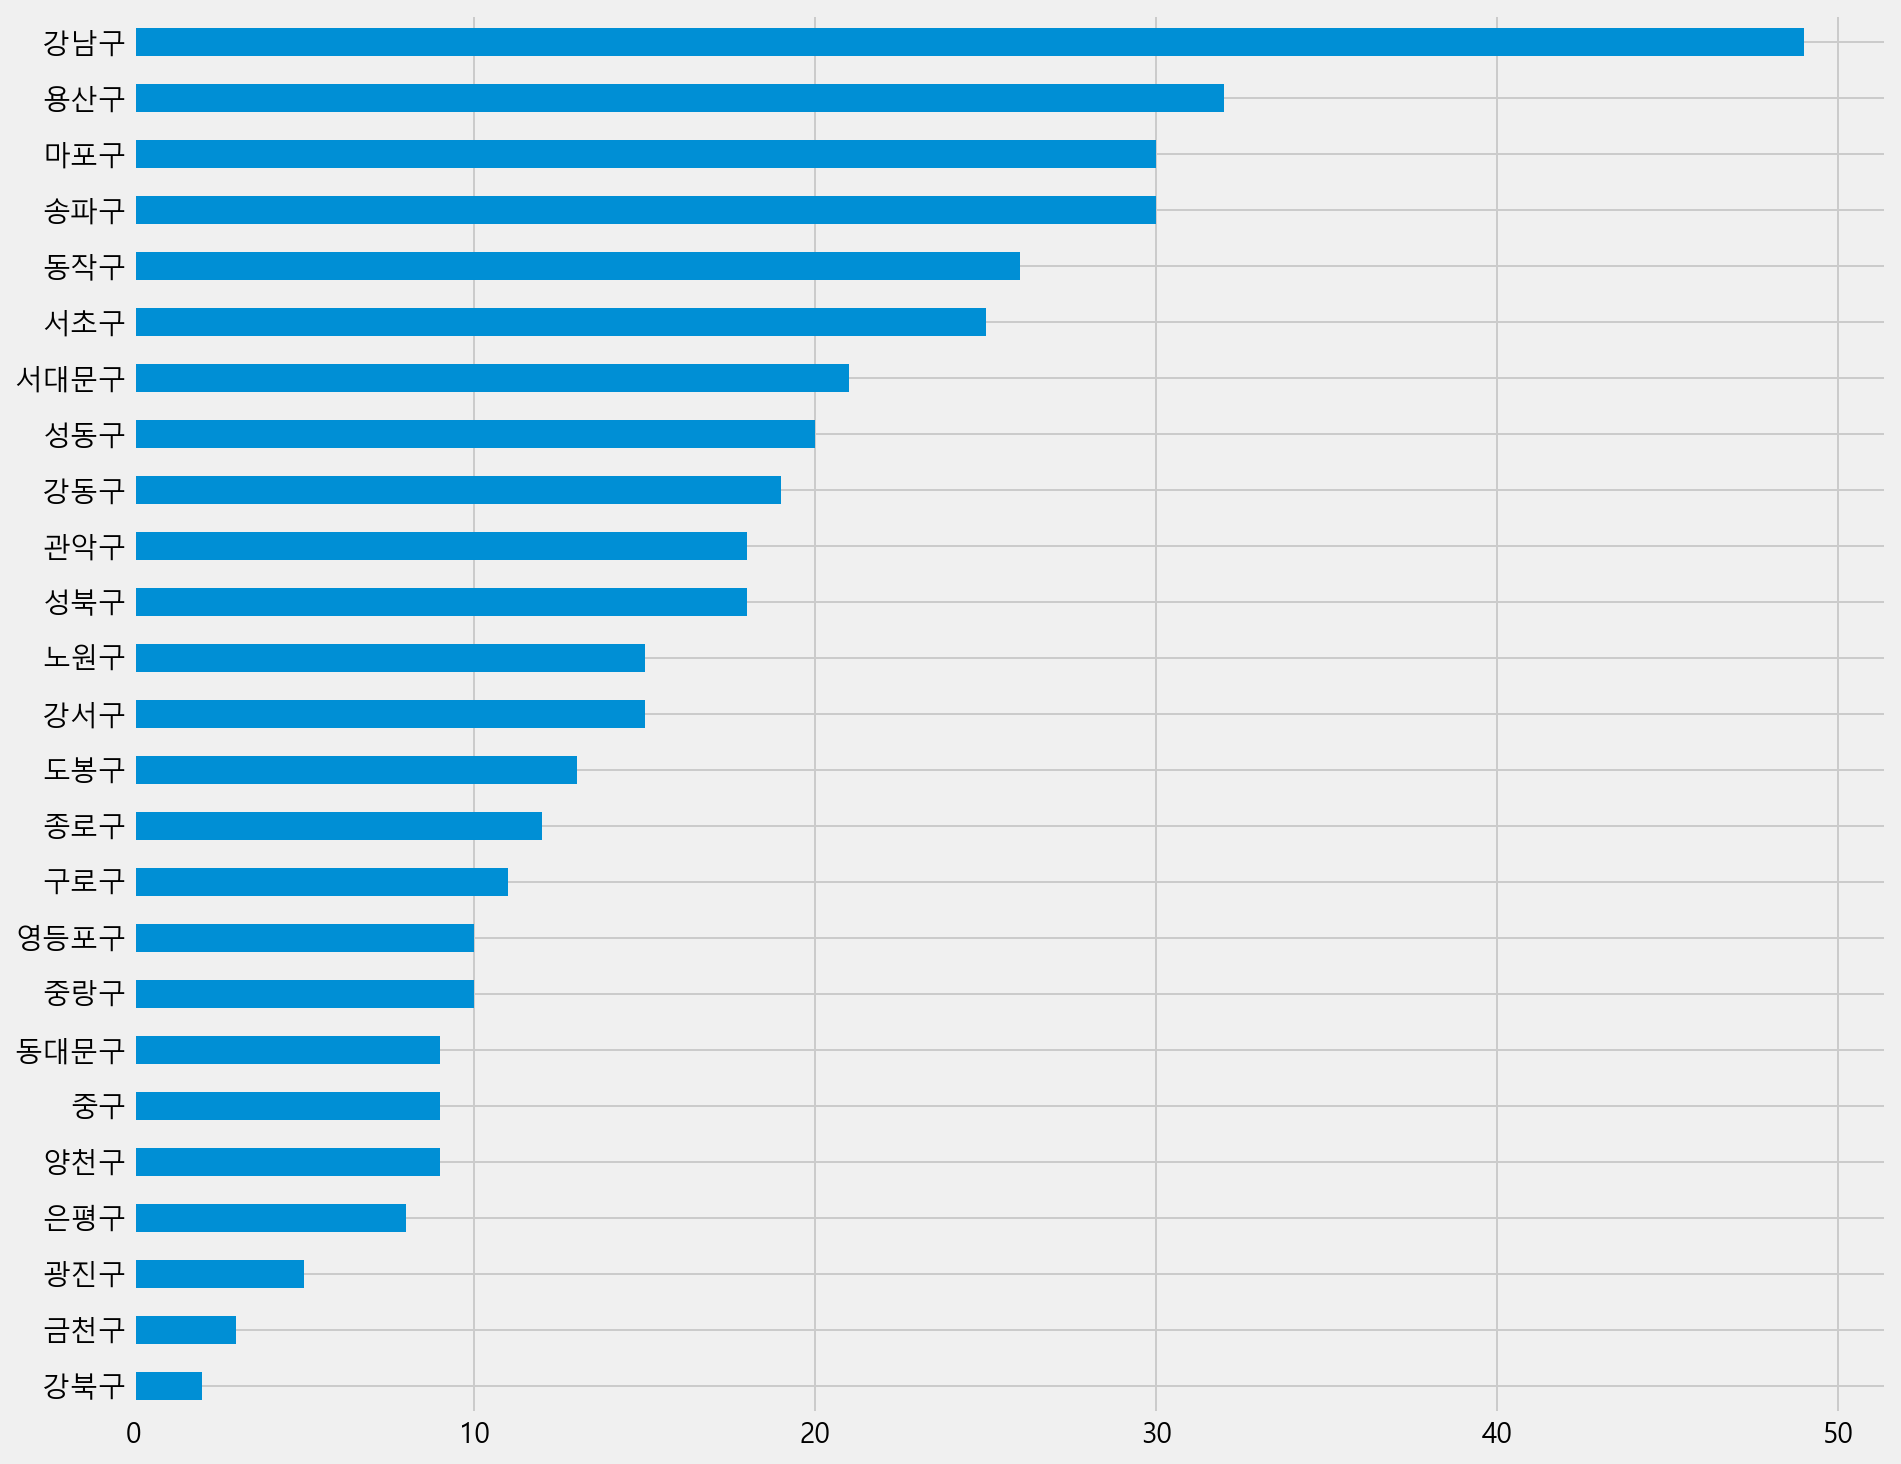

In [317]:
# 서울이 아닌 지역은 빼고 싶다! 위에 시리즈에서는 지역이름이 index이므로 아래와 같이 해줬다
# 데이터프레임 다 만들어놓고 특정 내용만 가져와서 그리고 싶으면 loc를 쓰자

oversea_gu.loc[oversea_gu.index != '타지역'].sort_values().plot.barh(figsize = (14,12))

### 해외접촉+구별 과 구별 전체를 함께 그리기

In [320]:
# 해외 접촉자 수 상관 없이는 아래와 같다

all_count_gu = df['지역'].value_counts()
all_count_gu

타지역     498
관악구     486
송파구     438
강남구     375
성북구     363
노원구     337
강서구     323
은평구     283
동작구     275
서초구     251
도봉구     233
영등포구    227
중랑구     211
강동구     211
구로구     209
양천구     202
동대문구    199
마포구     191
성동구     165
서대문구    165
강북구     161
용산구     158
광진구     146
금천구      99
종로구      98
중구       68
Name: 지역, dtype: int64

In [329]:
pd.DataFrame({'해외확진수': oversea_gu,
             '전체확진수': all_count_gu}).head()

,해외확진수,전체확진수
강남구,49,375
강동구,19,211
강북구,2,161
강서구,15,323
관악구,18,486


In [330]:
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns  = ['전체확진수']
df_all_gu.head()

,전체확진수
타지역,498
관악구,486
송파구,438
강남구,375
성북구,363


In [331]:
df_oversea_gu = oversea_gu.to_frame()
df_oversea_gu.columns = ['해외유입확진수']
df_oversea_gu.head()

,해외유입확진수
타지역,61
강남구,49
용산구,32
마포구,30
송파구,30


#### merge 방법1

In [336]:
df_all_gu.merge(df_oversea_gu, left_on = df_all_gu.index, right_on = df_oversea_gu.index)

,key_0,전체확진수,해외유입확진수
0,타지역,498,61
1,관악구,486,18
2,송파구,438,30
3,강남구,375,49
4,성북구,363,18
5,노원구,337,15
6,강서구,323,15
7,은평구,283,8
8,동작구,275,26
9,서초구,251,25


#### merge 방법 2

In [339]:
oversea_sum = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
oversea_sum.head(3)

,전체확진수,해외유입확진수
타지역,498,61
관악구,486,18
송파구,438,30


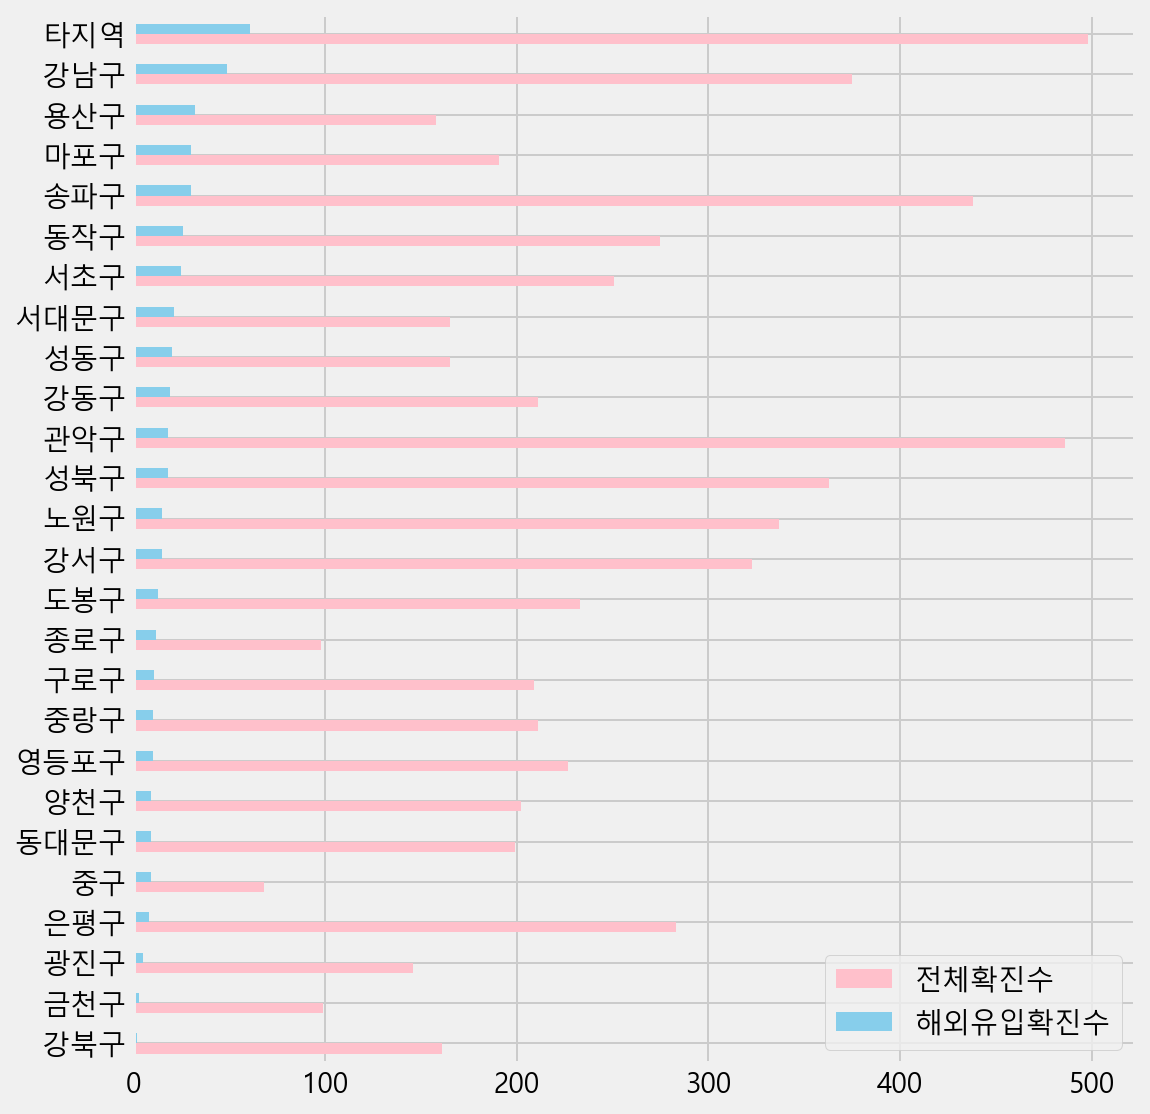

In [352]:
oversea_sum.sort_values(by='해외유입확진수').plot.barh(figsize = (8,9), color = ['pink','skyblue'])

In [358]:
oversea_sum['해외유입비율'] = (oversea_sum['해외유입확진수'] / oversea_sum['전체확진수'])*100
oversea_sum.sort_values(by ='해외유입비율', ascending = False)

,전체확진수,해외유입확진수,해외유입비율
용산구,158,32,20.253165
마포구,191,30,15.706806
중구,68,9,13.235294
강남구,375,49,13.066667
서대문구,165,21,12.727273
타지역,498,61,12.248996
종로구,98,12,12.244898
성동구,165,20,12.121212
서초구,251,25,9.960159
동작구,275,26,9.454545


### 해외유입 확진자 중 퇴원 여부 시각화

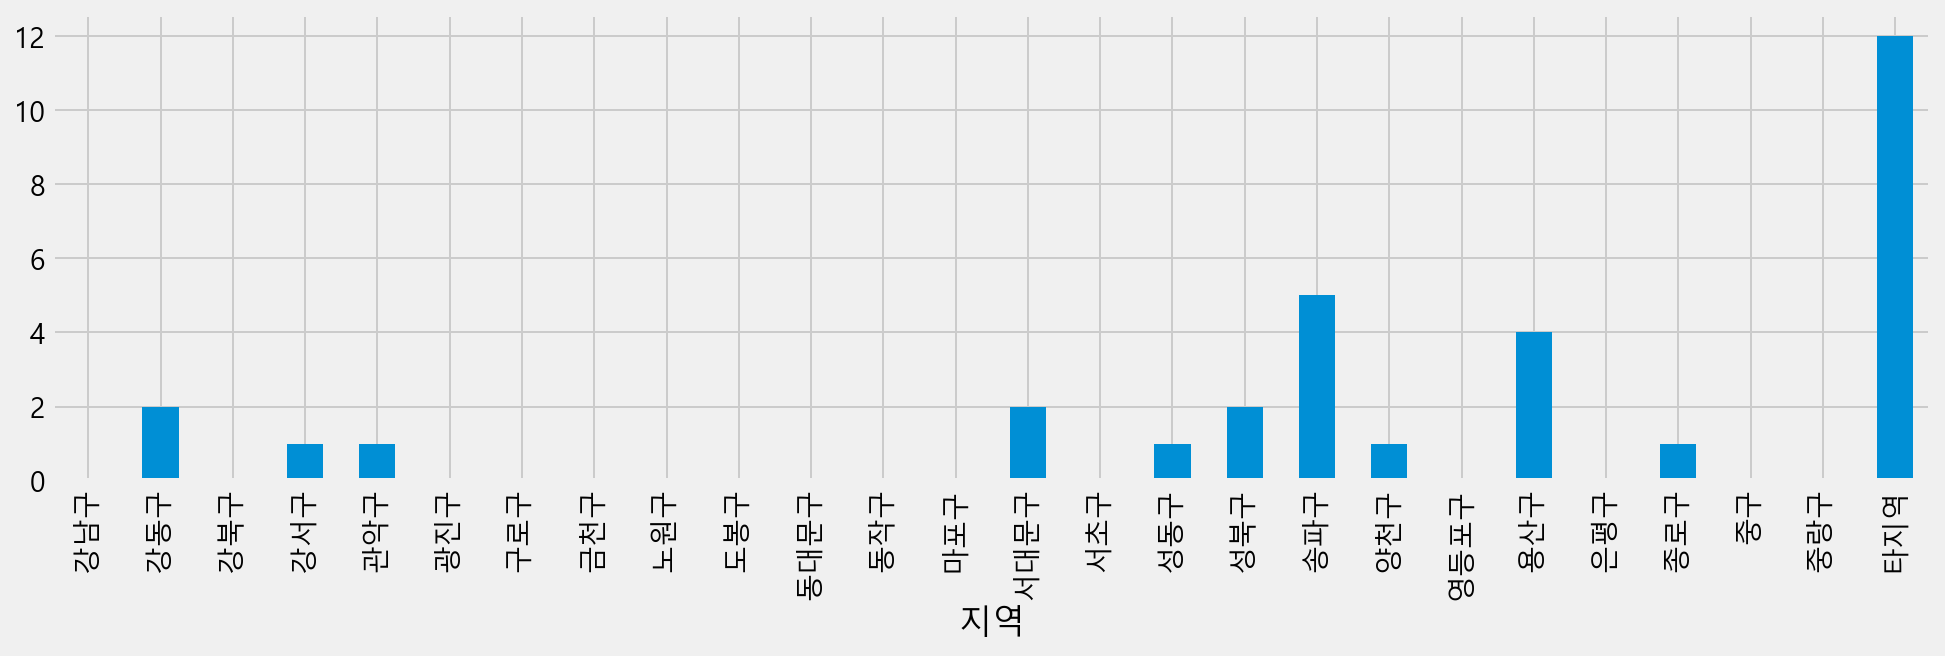

In [379]:
oversea_cure = df_oversea.groupby(['지역','퇴원'])['연번'].count().unstack()
oversea_cure = oversea_cure.fillna(0).astype(int)
oversea_cure['치료중'].plot.bar(figsize = (15,4))

### 월별 해외 확진자 수

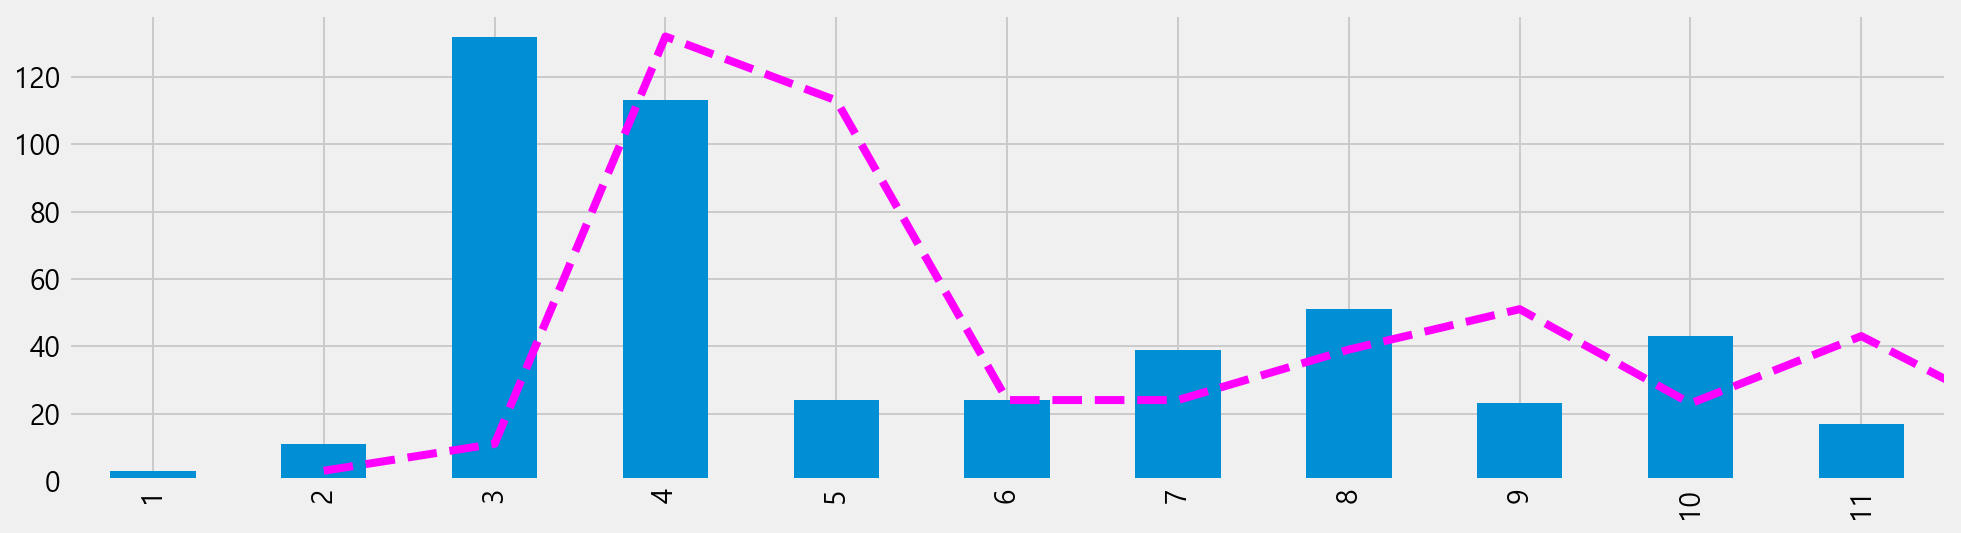

In [391]:
oversea_month = df_oversea['월'].value_counts()
oversea_month.sort_index().plot(figsize =(15,4), color = 'magenta', style = '--')
oversea_month.sort_index().plot.bar(figsize =(15,4))

### Groupby, crosstab, pivot_table

### GROUPBY 로 구하기

In [404]:
# 그룹바이 해줄 때 지정해준 컬럼 순서대로
# 잊지말자 unstack (인덱스 중 하나 컬럼으로 보내기)

month_oversea_gu = df_oversea.groupby(['월','지역'])['연번'].count().unstack()
month_oversea_gu= month_oversea_gu.fillna(0).astype(int)
month_oversea_gu.style.background_gradient(cmap ='Greens')

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


## CROSSTAB으로 구하기

In [418]:
# style.bar로 하면 각 칸에 게이지 형태로 표현해준다 (아래처러 뭐가 많으면 쓰면 안되겠다)

month_oversea_gu2 = pd.crosstab(df_oversea['월'], df_oversea['지역'])
month_oversea_gu2.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


## Pivot_table
* 피봇은 그냥 행렬 바꾸기
* 피봇테이블은 연산까지 가능하다는 점이 차이점

In [412]:
# pivot_table은 디폴트 집계함수가 mean임

pd.pivot_table(df_oversea, index = '월', columns = '지역', aggfunc = 'count', fill_value = 0)

거주지                                      ...  환자                           \
지역 강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구  ... 성북구 송파구 양천구 영등포구 용산구 은평구 종로구   
월                                           ...                                
1    0   0   0   1   0   0   0   0   0   0  ...   0   0   0    0   0   0   0   
2    2   1   0   1   0   1   0   0   0   0  ...   0   1   0    1   0   0   1   
3   21   4   1   3   6   3   9   3   3   4  ...   5   9   1    3   6   3   2   
4   16   1   0   2   5   0   0   0   2   3  ...   6   8   1    5   5   2   2   
5    2   2   1   2   1   0   0   0   2   2  ...   0   1   0    0   6   0   1   
6    0   2   0   0   2   0   1   0   2   0  ...   0   1   3    1   0   2   1   
7    0   4   0   1   1   0   0   0   2   1  ...   2   0   0    0   2   0   2   
8    1   0   0   2   2   1   0   0   2   3  ...   3   3   1    0   5   1   1   
9    4   1   0   0   0   0   0   0   1   0  ...   0   0   2    0   0   0   0   
10   3   3   0   2   1   0   1   0   1   0  ...   1   3   0    0   7   0   2   
11   0   1   0   1   0   0   0   0   0   0  ...   1   4   1    0   1   0   0   

               
지역 중구 중랑구 타지역  
월              
1   0   1   0  
2   0   0   2  
3   3   5   8  
4   0   2  11  
5   0   0   0  
6   1   1   1  
7   2   1   4  
8   3   0  14  
9   0   0   7  
10  0   0   8  
11  0   0   6  

[11 rows x 390 columns]

In [423]:
pd.options.display.max_columns = 50

In [424]:
month_oversea_gu3 = pd.pivot_table(df_oversea, index = '월', columns = '지역', 
                                   values = '연번', aggfunc = 'count', fill_value = 0)
month_oversea_gu3

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


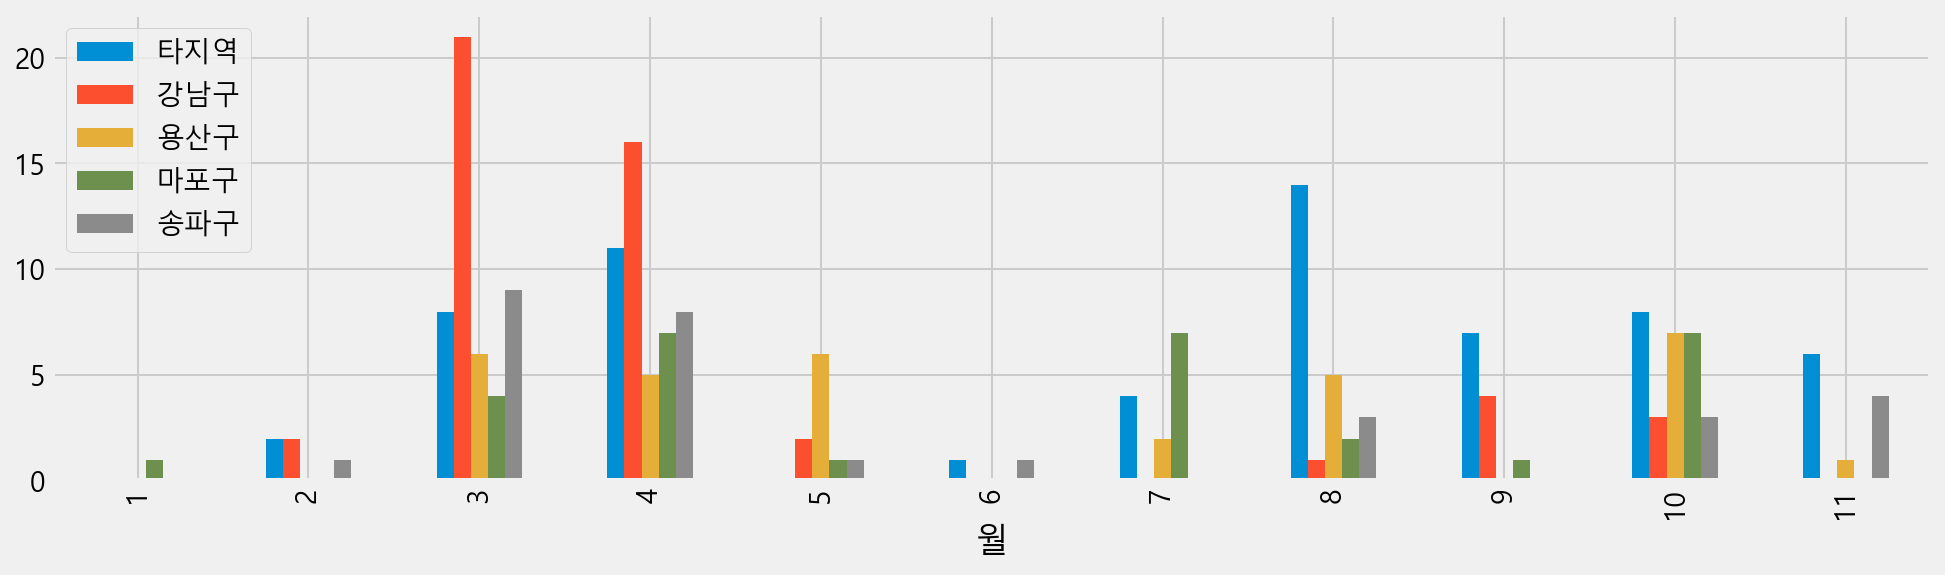

In [435]:
graph = month_oversea_gu3[top_month_gu].plot.bar(figsize = (15,4))
graph.legend(loc=2)

In [433]:
top_month_gu = df_oversea['지역'].value_counts().head().index

### 어느 국가에서 많이 유입되었을까

In [443]:
# 여기서는 구별로 어떤 나라에서 유입되었는지 모든 유입국가로 테이블을 만들었다

gu_oversea = df_oversea.groupby(['해외', '지역'])['연번'].count().unstack()
gu_oversea = gu_oversea.fillna(0).astype(int)

In [441]:
# 피벗테이블로 위에서 만든거랑 똑같이 만들었음
# value는 위에 groupby에서처럼 어떤 값을 집계할 것인지! crosstab 제외하고 다 적어줘야 함
# fill_value하면 na값을 채울 수 있다

gu_oversea2 = df_oversea.pivot_table(index = '해외', columns = '지역', values = '연번', 
                       aggfunc = 'count', fill_value =0)
gu_oversea2

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,1,0
가나,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,1,0,0,1,0,0,0,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,1,0,4
네덜란드,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
네팔,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [444]:
gu_oversea.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,1,0
가나,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,1,0,0,1,0,0,0,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,1,0,4
네덜란드,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
네팔,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [450]:
# 강남 3구만 불러와서 보려면 아래와 같다

gu_oversea[['강남구', '서초구', '송파구']].style.background_gradient()

지역,강남구,서초구,송파구
해외,,,
21263,0,0,0
UAE,0,0,1
가나,0,0,0
나이지리아,0,0,0
남미,4,0,2
네덜란드,0,0,0
네팔,0,0,0
러시아,1,0,0
말레이시아,0,0,0


In [456]:
# 행렬접근은 잊지말자 loc

gu_oversea.loc[['미국', '남미', '유럽'], ['성동구', '마포구', '용산구']]

지역,성동구,마포구,용산구
해외,,,
미국,10,5,7
남미,0,3,2
유럽,5,10,11


In [459]:
# month_gu는 위에서 해외 유입자가 많은 구들 5개를 추려놓은 리스트 값
# 리스트를 바로 넣어서도 불러올 수 있다

gu_oversea[month_gu].tail(3)

지역,타지역,강남구,용산구,마포구,송파구
해외,,,,,
포르투칼,0,0,0,0,0
필리핀,0,2,1,1,0
홍콩,0,0,0,0,0


In [461]:
gu_oversea
gu_oversea[month_gu].tail(3)

지역,타지역,강남구,용산구,마포구,송파구
해외,,,,,
포르투칼,0,0,0,0,0
필리핀,0,2,1,1,0
홍콩,0,0,0,0,0


In [463]:
# 특정 구에 대한 확진자 수만 가져올래도 확진자 없어도 일단 가져온다
# 따라서 na값을 되살려서 불러오려는 모든 구들에 유입된 해외 확진자가 없다면 불러오지 않게 할 수 있다

gu_oversea3 = df_oversea.pivot_table(index = '해외', columns = '지역', values = '연번', 
                       aggfunc = 'count')
gu_oversea3.head(1)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [470]:
# how = 'all'로 모든 구에서 유입자가 없는 국가의 경우 포함되지 않게 한다

gu_oversea3[month_gu].dropna(how = 'all').fillna(0).astype(int)

지역,타지역,강남구,용산구,마포구,송파구
해외,,,,,
UAE,0,0,0,0,1
남미,4,4,2,3,2
네팔,4,0,0,0,0
러시아,0,1,0,1,0
몰타,0,0,0,1,0
미국,15,29,7,5,10
방글라데시,2,1,0,0,0
사우디아라비아,3,0,0,0,3
싱가포르,0,0,0,0,1
